--------------------------------------------------------------
# **Employee Attrition Prediction**
--------------------------------------------------------------

### Business Inteligence and Data Science Solutions

**Team Members:**


*   Ma. Fernanda Maldonado Valles
*   Ian Nikolay Doshner Galland
*   Andrea Ponce de León
*   Juan Carlos Sánchez Gutiérrez
*   Sebastián Zenteno Barreiro

**Introduction:**

One Business Network is a consulting firm that has thousands of employees spread all over the world. The company wants to hire the best talent available and retain it for as long as possible. A large amount of resources are spent on retaining existing employees through various initiatives. Managers want to reduce the cost of retaining employees. To do this, they propose limiting incentives to only those employees who are at risk of leaving.

**Objective:**

This model is meant to be used by the company's Human Resources department, more specific, the Recruitment team.

The objective is to know, during a recruitment process, if the job applicant is going to quit or not later on.

We'll do this by:
* Identifying the different factors that drive desertion.
* Building a model to predict if an employee will quit or not.

**Importance:**
By identifying these factors, HR can take proactive measures to mitigate attrition, ultimately reducing costly turnover rates. This approach not only minimizes recruitment and training expenses but also optimizes resource distribution by focusing efforts on candidates who are more likely to stay long-term. It also empowers HR to make data-driven hiring decisions, fostering a workforce that is not only qualified but also aligned with the company's culture and committed to its long-term success. Additionally, the models we'll create will allow 'One Business Network' to anticipate talent needs and improve employee satisfaction.

## **Data description**

* **EmployeeNumber** - Unique employee ID
* **Attrition** - Indicates if the employee quit or not
* **Age** - Employee's age
* **BusinessTravel** - Travel commitments for work
* **DailyRate** - Data description not available
* **Departament** - Employee's department
* **DistanceFromHome** - Distance from employee's home to office (in km.)
* **Education** - Employee's level of education. 1-Lower than university, 2-University, 3-Bachelor's Degree, 4-Maesters, 5-Doctorate
* **EducationField** - Fields of employee's education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Sex**: employee's sex
* **HourlyRate** - Data description not available
* **JobInvolvement** - Comprommitment with work 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Work level (1 to 5)
* **JobRole** - Job functions
* **JobSatisfaction*** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available
* **NumCompaniesWorked** - NUmber of companies in which the employee worked
* **Over18** - Describes if the employee is +18
* **OverTime** - Describes if the employee is working extra hours
* **PercentSalaryHike** - The percentage increase in salary from last year
* **PerformanceRating**: 1-Low, 2-Good, 3-Excelent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Level of stocks
* **TotalWorkingYears** - Amount of years the employee has worked
* **TrainingTimesLastYear** - Number of trainings the employee attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excelent, 4-Outstanding
* **YearsAtCompany** - Amount of years working at the company
* **YearsInCurrentRole**: Amount of years in their current role
* **YearsSinceLastPromotion** - Years since their last promoiton
* **YearsWithCurrManager** - Years spent with their current manager

* **"Data description not available"** this means that the variables with this legend do not have background information. We need to analyze what does it mean.

## **Import libraries**

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# For the treemap
!pip install squarify
import squarify

# Method for scaling variables
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
  # LogisticRegression is a class within scikit-learn that is used for
  # implementing the logistic regression algorithm.
  # Logistic regression is a fundamental and commonly used statistical method
  # for binary and multi-class classification tasks.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
  # "LinearDiscriminantAnalysis" is a class within scikit-learn that is
  # used for performing Linear Discriminant Analysis (LDA).
  # LDA is a statistical technique used for dimensionality
  # reduction and classification tasks.

# Metrics to evaluate models
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#from google.colab import drive
#drive.mount('/content/drive')

### **Loading the data**

In [ ]:
# Reading the dataset
#df = pd.read_csv('Empleados_Datos_Renuncia.csv')
df = pd.read_csv("https://raw.githubusercontent.com/FoxuF/DataSetsMachineLearning/main/DataSets/Empleados_Datos_Renuncia.csv")

In [ ]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,...,1,80,0,8,0,1,6,4,0,5
1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,...,4,80,1,10,3,3,10,7,1,7
2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,...,2,80,0,7,3,3,0,0,0,0
3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,...,3,80,0,8,3,3,8,7,3,0
4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


### **Data Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   Age                       2940 non-null   int64 
 3   BusinessTravel            2940 non-null   object
 4   DailyRate                 2940 non-null   int64 
 5   Department                2940 non-null   object
 6   DistanceFromHome          2940 non-null   int64 
 7   Education                 2940 non-null   int64 
 8   EducationField            2940 non-null   object
 9   EnvironmentSatisfaction   2940 non-null   int64 
 10  Gender                    2940 non-null   object
 11  HourlyRate                2940 non-null   int64 
 12  JobInvolvement            2940 non-null   int64 
 13  JobLevel                  2940 non-null   int64 
 14  JobRole                 

**Observations:**

- There are **2940 observations and 34 columns** in our data set.
- All columns have 2940 non-null values, this means that **there are non missing values** in our data set.

**Looking for unique values**

In [ ]:
# Unique values in our variables
df.nunique()

EmployeeNumber              2940
Attrition                      2
Age                           43
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

**Observations:**

- The number of employees is a unique ID per employee. We can delete this column since it won't add any value to our analysis.
- The "Over18" and "StandardHours" columns have only one unique value. Therefore, we can delete these two columns since they won't add any value to our analysis.
- Based on the number of unique values in each column and our data set description, we can identify continuous columns and categories within the data.

In [ ]:
# Deleting unwanted columns
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [ ]:
# Creating list of columns with numeric values
num_cols = ['DailyRate', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'TotalWorkingYears',
          'YearsAtCompany', 'NumCompaniesWorked', 'HourlyRate',
          'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TrainingTimesLastYear']

# Creating list of columns with non-numeric values
cat_cols = ['Attrition', 'OverTime', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'JobSatisfaction',
            'EnvironmentSatisfaction', 'WorkLifeBalance', 'StockOptionLevel', 'Gender', 'PerformanceRating', 'JobInvolvement',
            'JobLevel', 'JobRole', 'MaritalStatus', 'RelationshipSatisfaction']

A little Data Cleaning just to be safe

In [ ]:
# Since we have character strings in our categorical variables we will remove spaces so its easier to handle them
def leading_space_remover(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype == "object":
            dataframe[i] = dataframe[i].map(str.strip)

In [ ]:
# Removes spaces
leading_space_remover(df)

In [ ]:
#We remove any NaN value in the dataset so there isnt any huge outlier
df = df.dropna(how='any')
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,No,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
2936,No,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
2937,No,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
2938,No,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
df.isnull().sum()

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Now that we verified that we are working with a clean dataset we can begin our analysis and train our models

## Data Exploration

In [ ]:
# Statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,2940.0,802.485714,403.440447,102.0,465.0,802.0,1157.0,1499.0
Age,2940.0,36.923810,9.133819,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,2940.0,9.192517,8.105485,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,2940.0,6502.931293,4707.155770,1009.0,2911.0,4919.0,8380.0,19999.0
MonthlyRate,2940.0,14313.103401,7116.575021,2094.0,8045.0,14235.5,20462.0,26999.0
PercentSalaryHike,2940.0,15.209524,3.659315,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,2940.0,11.279592,7.779458,0.0,6.0,10.0,15.0,40.0
YearsAtCompany,2940.0,7.008163,6.125483,0.0,3.0,5.0,9.0,40.0
NumCompaniesWorked,2940.0,2.693197,2.497584,0.0,1.0,2.0,4.0,9.0
HourlyRate,2940.0,65.891156,20.325969,30.0,48.0,66.0,84.0,100.0


**Observations:**

- **The average age of employees is around 37 years old**. It has a high range, from 18 to 60 years old, this indicates that there is diversity of age within the organization.
- **At least 50% of employees live within a 7km radius** from the organization. Never the less, there's still some out of range values, since our maximum values is 29 km.
- **The average monthly income per employee is of 6,500 USD.** It has a high value range of 1K-20K USD, which is to be expected for the salary distribution of any organization. We can also see that there's a great difference between the 3rd quartile value (around 8,400 USD) showing that the top earners in the company have a disproportionately high income compared to the rest of the employees. Again, we understand this as a common in most organizations.
- **The average pay raise for an employee is around 15%.** At least 50% of employees had a pay rise of 14% or less, being the maximum pay raise 25%
- The average number of years an employee has been working at the company is 7 years.
- **On average, the number of years an employee earned a promotion is 2.19 years**. Most of employees have been promoted since the last year.

### **Univariate analysis of numerical variables**

<Figure size 1400x1400 with 0 Axes>

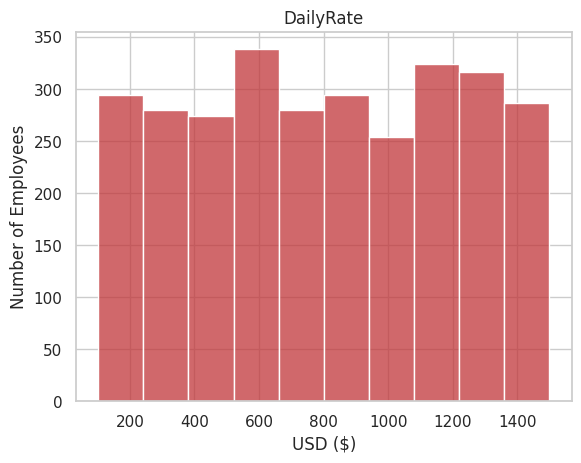

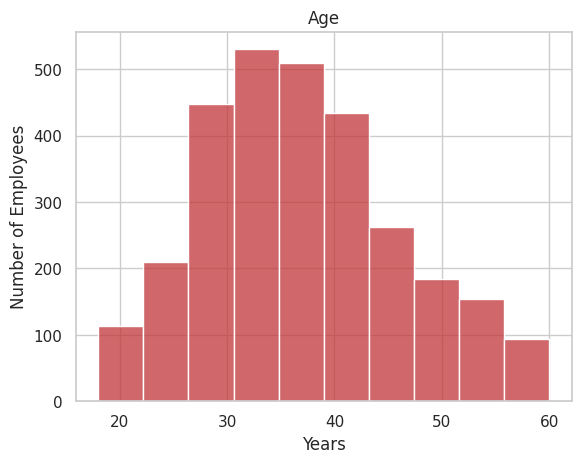

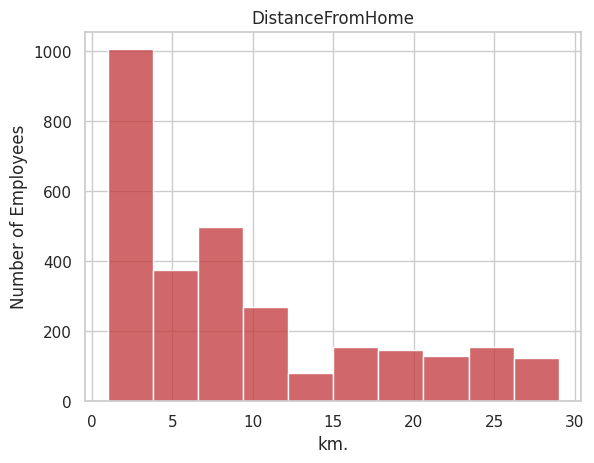

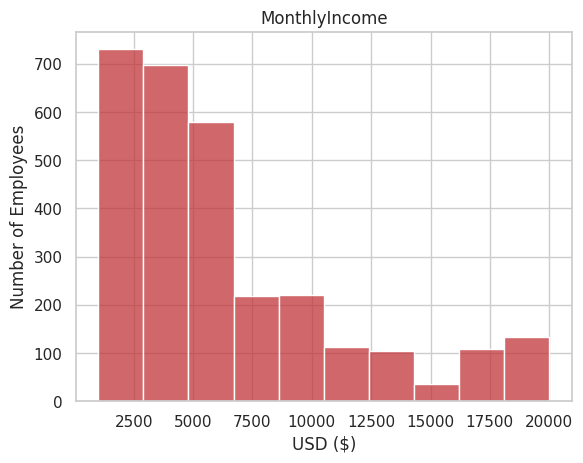

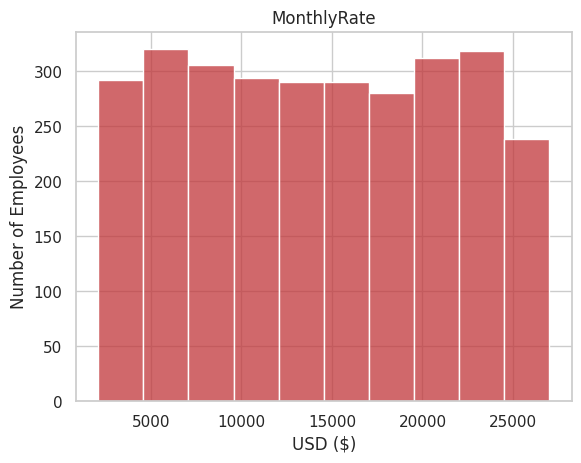

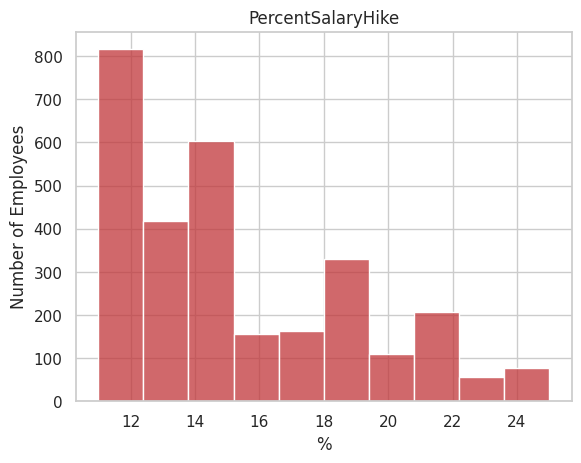

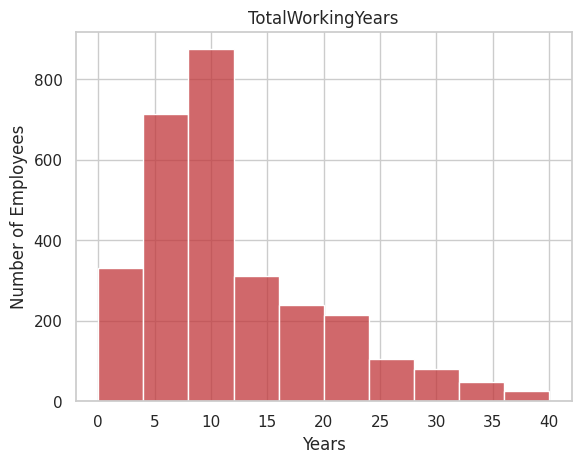

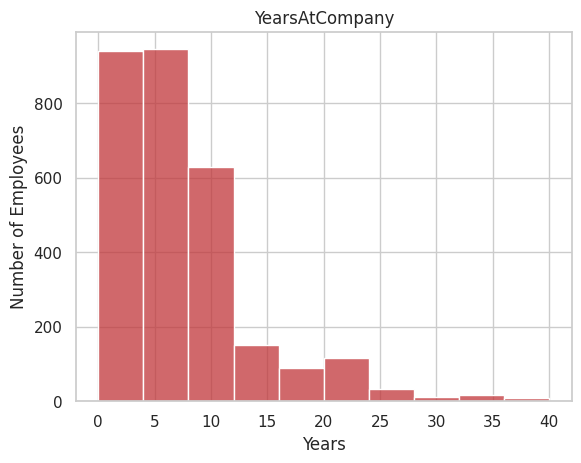

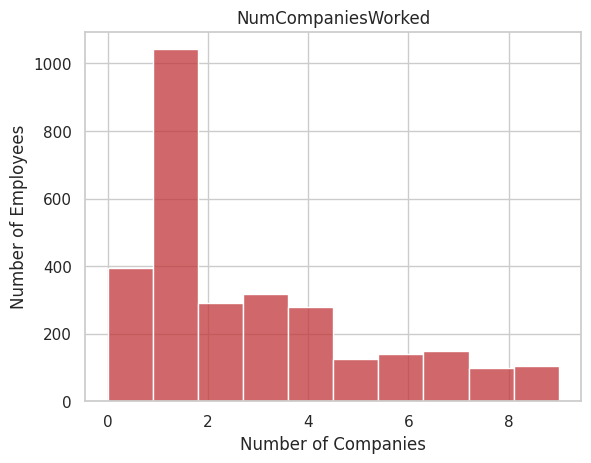

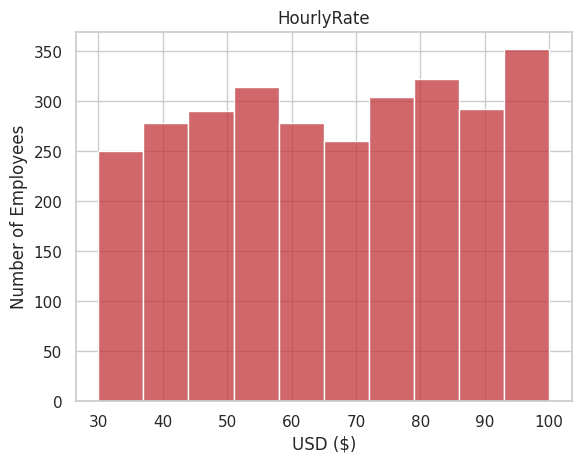

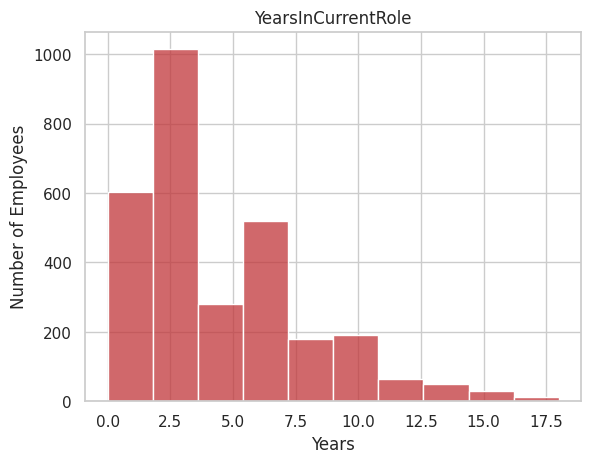

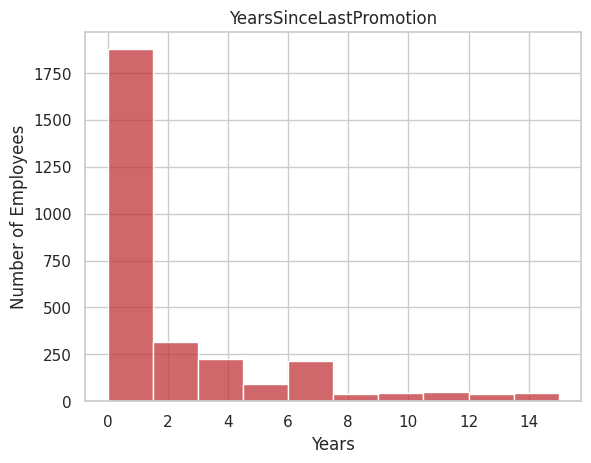

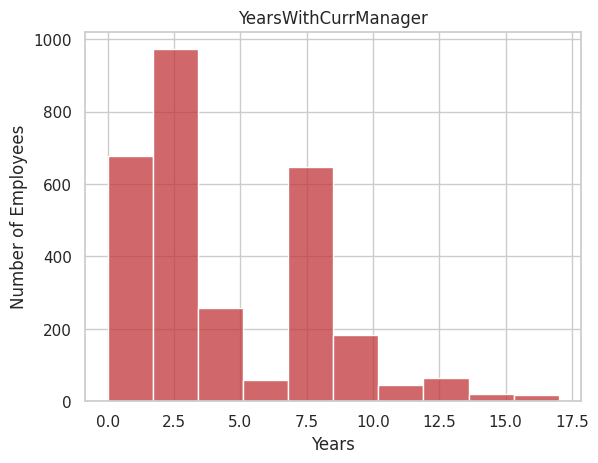

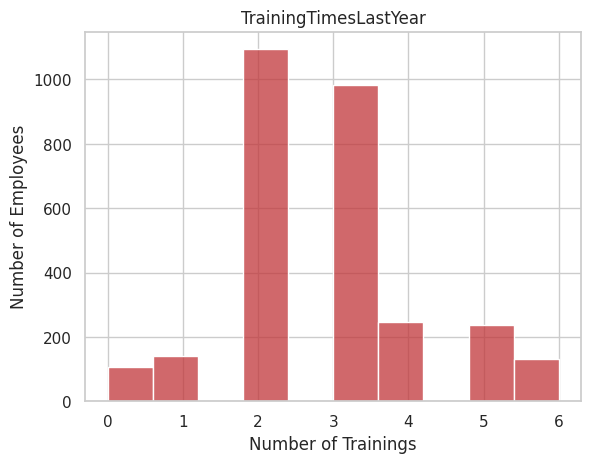

In [ ]:
# Histogram
# Thia plot shows columns with numeric values vs the number of employees
# This willo help us to understand the most common characteristics among employees

sns.set(style="whitegrid")
custom_palette=sns.set_palette('RdBu')

plt.figure(figsize=(14, 14))

x_axis_labels = {'DailyRate':'USD ($)',
                 'Age':'Years',
                 'DistanceFromHome':'km.',
                 'MonthlyIncome':'USD ($)',
                 'MonthlyRate':'USD ($)',
                 'PercentSalaryHike':'%',
                 'TotalWorkingYears':'Years',
                 'YearsAtCompany':'Years',
                 'NumCompaniesWorked':'Number of Companies',
                 'HourlyRate':'USD ($)',
                 'YearsInCurrentRole':'Years',
                 'YearsSinceLastPromotion':'Years',
                 'YearsWithCurrManager':'Years',
                 'TrainingTimesLastYear':'Number of Trainings'
                 }

for col in num_cols:
    plt.figure()
    sns.histplot(data=df[col], bins=10, kde=False, palette=custom_palette)
    plt.xlabel(x_axis_labels[col])
    plt.ylabel("Number of Employees")
    plt.title(f"{col}")
    plt.show()

**Observations:**

- **Age Distribution:** the age distribution closely resembles a normal distribution, with the majority of employees falling within the age range of 25 to 50.
- **Distance From Home:** the distribution of the "Distance From Home" variable is skewed to the right, indicating that most employees live in close proximity to their workplace. It raises an intriguing question regarding whether employees who live farther away are more inclined to leave their positions.
- **MonthlyIncome and TotalWorkingYears:** both "MonthlyIncome" and "TotalWorkingYears" distributions skew to the right, suggesting that a significant portion of the workforce occupies entry to mid-level positions within the organization.
- **Salary Increase Percentage:** the distribution of salary increase percentages is skewed to the right, implying that the majority of employees receive lower percentage salary increases.
- **YearsAtCompany:** the distribution of "YearsAtCompany" reveals a substantial number of employees who have been with the organization for more than a decade, signifying a strong sense of loyalty.
- **YearsInCurrentRole:** the distribution of "YearsInCurrentRole" exhibits multiple peaks, notably at 0, 2, and 7. Some employees have remained in the same role for extended periods, with a few even surpassing 15 years.
- **YearsSinceLastPromotion:** the distribution of "YearsSinceLastPromotion" suggests that certain employees have not received promotions for 10-15 years but continue to work for the organization. This likely represents experienced individuals in senior management roles.

- The distributions of "DailyRate," "HourlyRate," and "MonthlyRate" appear uniform, indicating that these variables might represent supplementary income for extra hours or days worked. These rates tend to be consistent across employees within the same department, resulting in uniform distributions. As they don't offer really significant value to our analysis, we'll remove these columns.

These observations provide valuable insights into the workforce characteristics and potential areas of interest for further analysis.

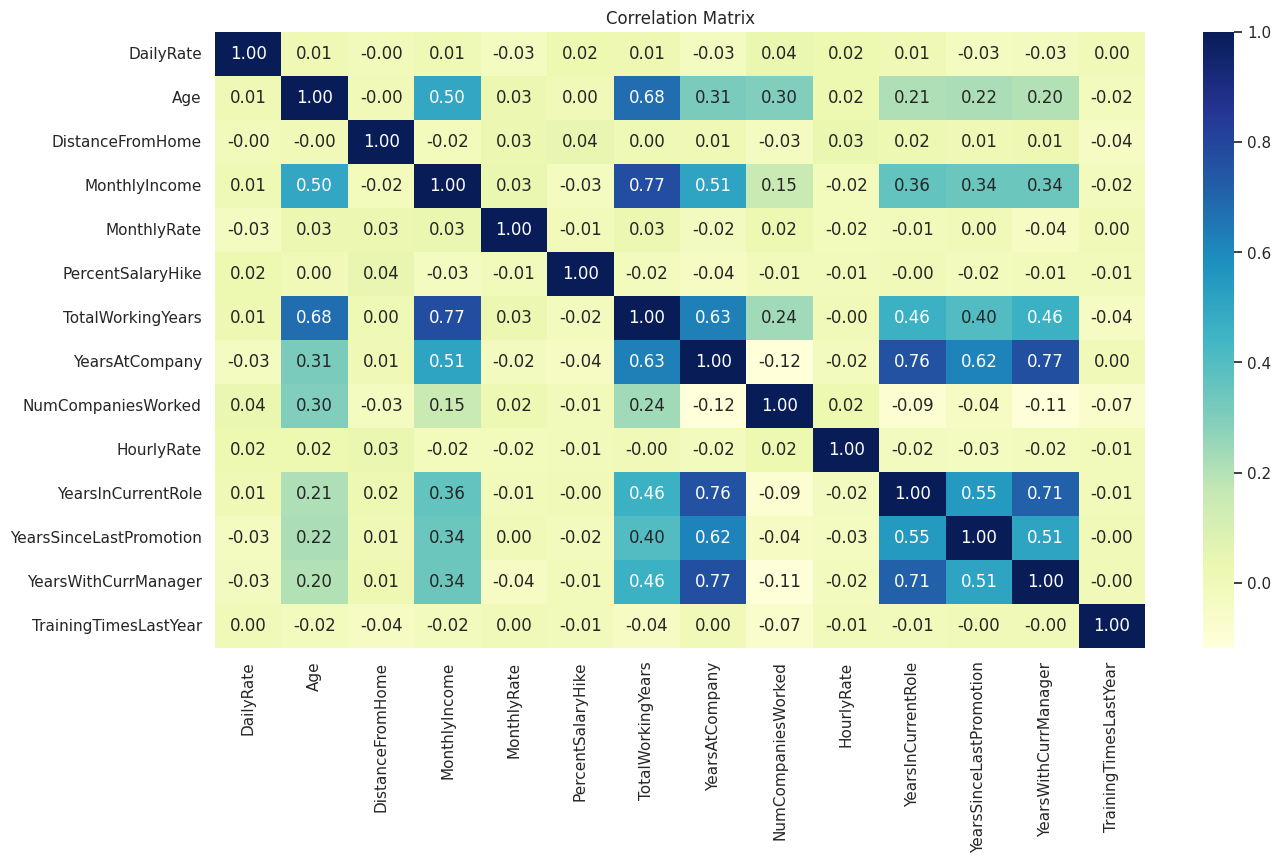

In [ ]:
# Correlation matrix
plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')
plt.title("Correlation Matrix")
plt.show()

**Observations:**

Based on the highest correlation values in the matrix.

- **Years at the Company vs. Years with Current Manager (0.77):**
  - There is also a positive correlation between the number of years an employee has been with the company and the number of years they have had their current manager. This indicates that employees who have been with the company for an extended period also tend to have the same manager for a longer time.
- **Monthly Income vs. Total Working Years (0.77):**
  - There is a strong positive correlation between an employee's monthly income and their total working years. In general, employees with more years of work experience tend to have higher monthly incomes, therefore, this value makes a lot of sense.
- **Years at the Company vs. Years in Current Role (0.76):**
  - There is a strong positive correlation between the number of years an employee has spent at the company and the number of years they have been in their current role. This suggests that, on average, employees who have been with the company for a longer time tend to stay in their current roles for longer periods.
- **Total Working Years vs. Age (0.68):**
  - There is a strong positive correlation between the total number of years an employee has worked in their career (not just at the current company) and their age. This is a common finding, as employees tend to accumulate more working years as they get older.
- **Years at the Company vs. Years Since Last Promotion (0.62):**
  - There is a moderate positive correlation between the number of years an employee has been with the company and the number of years since their last promotion. While there is a tendency for employees with more years at the company to have spent more time since their last promotion, the relationship is not as strong as the previous two correlations.

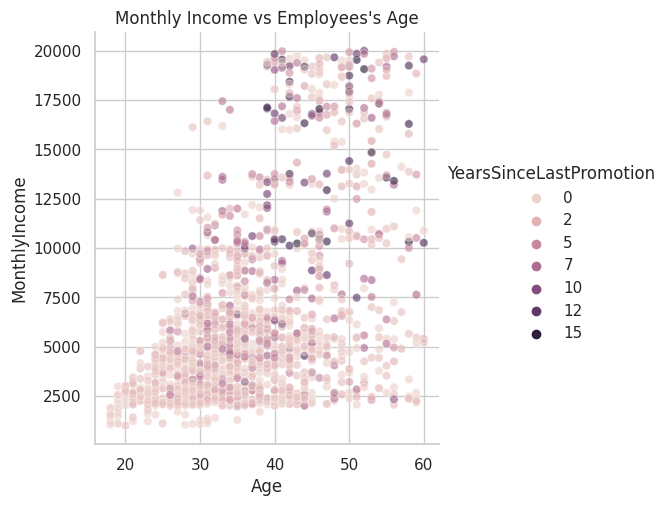

In [ ]:
# Scatter plot which shows the relationship between Monthly Income and Employees' Age

sns.relplot(y = "MonthlyIncome", x = "Age", data=df, kind="scatter",hue="YearsSinceLastPromotion", alpha=0.4)
plt.title("Monthly Income vs Employees's Age")
plt.show()

**Observations:**

- **Age and Monthly Income:** there is a positive correlation between age and monthly income, indicating that as employees' age increases, their monthly income tends to rise as well. This suggests that older employees generally earn higher salaries, possibly due to their experience and seniority within the organization.

- **Age and Promotions:** Conversely, there is a negative correlation between age and the frequency of promotions. As employees get older, promotions become less frequent. This observation suggests that promotions are more common among younger employees, potentially as they progress in their careers or transition between roles within the company.

### **Univariate analysis of categorical variables**

In [ ]:
# Analyze the counts of each categorical answer

for i in cat_cols:
    print(df[i].value_counts(normalize = True))

    print('*' * 40)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64
****************************************
No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64
****************************************
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64
****************************************
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64
****************************************
3    0.389116
4    0.270748
2    0.191837
1    0.115646
5    0.032653
Name: Education, dtype: float64
****************************************
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64
****************************************
4    0.312245
3    0.300680
1    0.196599
2    0.

**Observations:**

- **Employee Attrition Rate:** the organization has an attrition rate of 16%, indicating the proportion of employees who have left their jobs.
- **Approximately 28% of Employees Work Overtime:** this appears relatively high and may suggest a stressful work-life balance for a significant portion of employees.
- **Travel Frequency:** about 71% of employees rarely travel, while roughly 19% have to travel frequently for work.
- **Educational Background: **around 73% of employees have educational backgrounds in Life Sciences and Medicine.
- **Department Distribution:** more than 65% of employees work in the Research and Development department.
- **Job Satisfaction and Work Environment:** close to 40% of employees have low (1) or moderate (2) job satisfaction and environmental satisfaction, indicating potentially lower morale within the organization.
- **Employee Engagement:** over 30% of employees show low (1) to moderate (2) levels of work engagement.
- **Stock Options:** more than 80% of employees either have no stock options or have very few.
- **Performance Ratings:** none of the employees have received performance ratings below 3 (excellent). Approximately 85% of employees have a performance rating of 3 (excellent), while the rest have a rating of 4 (outstanding). This could indicate a culture of high performance, or it may suggest tolerance in the organization's performance evaluation process.

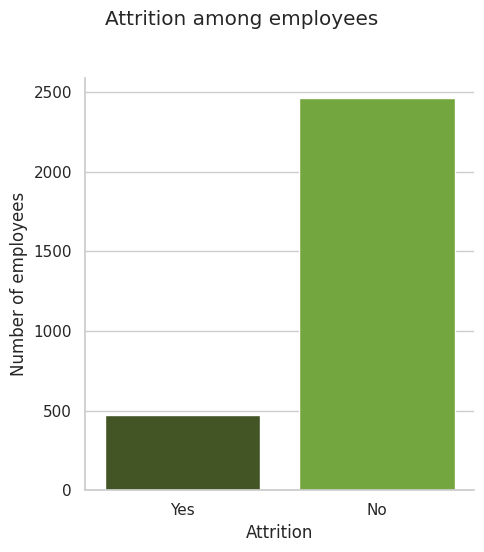

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


In [ ]:
# Bar chart (Attrition Status)
# This bar helps us see how many employees (from our df) quit their job

custom_palette = ["#455D1D", "#74B72E"]  # Green shades

sns.set(style="whitegrid")
sns.set_palette(custom_palette)

g2 = sns.catplot(x='Attrition',
                 data=df,
                 kind='count')

#Add title and axes labels
g2.fig.suptitle('Attrition among employees', y=1.10)
g2.set(xlabel='Attrition',
       ylabel='Number of employees')

plt.show()

print(df['Attrition'].value_counts(normalize = True))

**Observations:**
- **Retention Success:** A significant majority of employees remain with the company, indicating a notably low attrition rate. This reflects the company's proficiency in retaining its workforce and suggests a strong sense of loyalty among its employees.

- **Attrition Rate:** Nonetheless, it's important to note that there is an employee **attrition rate of 16%**. To better understand the underlying factors contributing to this attrition rate, we need to delve into the characteristics and circumstances surrounding employee departures. By identifying these factors, we can develop predictive models that assess the likelihood of specific profiles deciding to leave their positions, helping us proactively address attrition concerns.

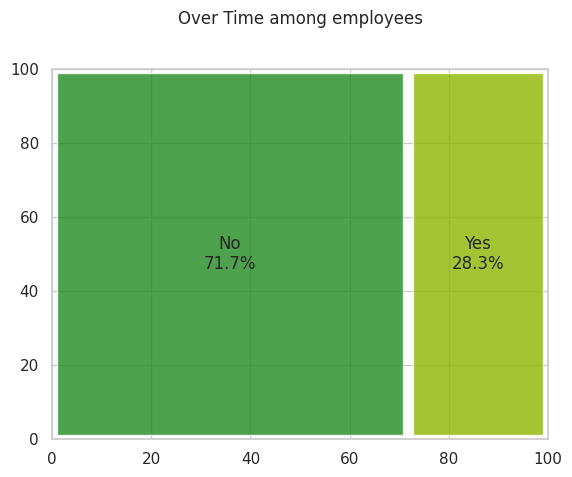

In [ ]:
# Treemap (Over Time)

colors = ["#228B22", "#8DB600"]

g2 = df["OverTime"].value_counts()
total = len(df)
percentages = (g2 / total) * 100

squarify.plot(sizes = g2,
              pad = 0.1,
              color=colors,
              label=[f'{label}\n{percentage:.1f}%' for label, percentage in zip(g2.index, percentages)],
              alpha=0.8)

plt.title('Over Time among employees', y=1.10)
plt.show()

- 71.7% of employees do not engage in overtime as part of their job responsibilities.
- In contrast, 28.3% of employees do participate in overtime activities as part of their job requirements.

This chart provides a concise overview of the proportion of employees who do or do not work overtime, highlighting the prevalence of overtime work within the organization.

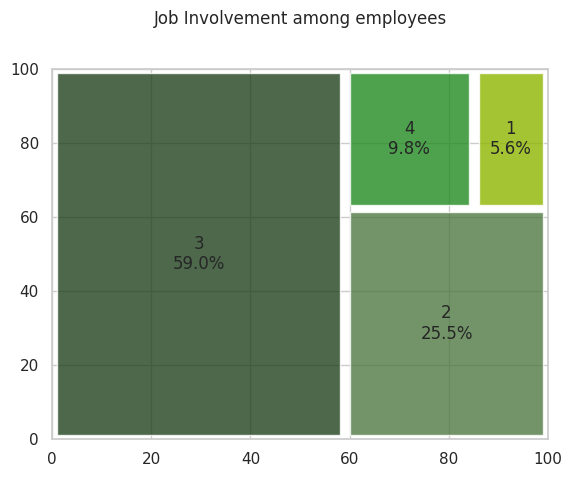

In [ ]:
# Treemap (Job Involvement)

colors = ["#21421E","#4F7942", "#228B22", "#8DB600"]

g2 = df["JobInvolvement"].value_counts()
total = len(df)
percentages = (g2 / total) * 100

squarify.plot(sizes = g2,
              pad = 0.1,
              color=colors,
              label=[f'{label}\n{percentage:.1f}%' for label, percentage in zip(g2.index, percentages)],
              alpha=0.8)

plt.title('Job Involvement among employees', y=1.10)

plt.show()

**Observations:**
- Most employees (59%) are highly involved in their job.
- Never the less, **more than 30% of employees have a poor job involvement**

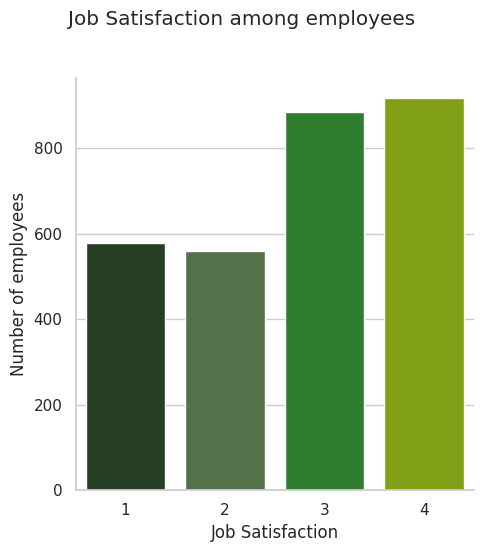

4    0.312245
3    0.300680
1    0.196599
2    0.190476
Name: JobSatisfaction, dtype: float64


In [ ]:
# Bar chart (Job Satisfaction Status)

custom_palette = ["#21421E","#4F7942", "#228B22", "#8DB600"]

sns.set(style="whitegrid")
sns.set_palette(custom_palette)


g4 = sns.catplot(x='JobSatisfaction',
                 data=df,
                 kind='count')

#Add title and axes labels
g4.fig.suptitle('Job Satisfaction among employees', y=1.10)
g4.set(xlabel='Job Satisfaction',
       ylabel='Number of employees')

plt.show()

print(df['JobSatisfaction'].value_counts(normalize = True))

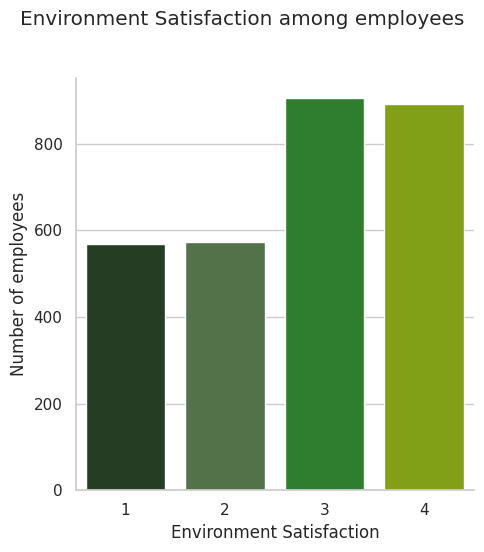

3    0.308163
4    0.303401
2    0.195238
1    0.193197
Name: EnvironmentSatisfaction, dtype: float64


In [ ]:
# Bar chart (Environment Satisfaction Status)

custom_palette = ["#21421E","#4F7942", "#228B22", "#8DB600"]

sns.set(style="whitegrid")
sns.set_palette(custom_palette)


g5 = sns.catplot(x='EnvironmentSatisfaction',
                 data=df,
                 kind='count')

#Add title and axes labels
g5.fig.suptitle('Environment Satisfaction among employees', y=1.10)
g5.set(xlabel='Environment Satisfaction',
       ylabel='Number of employees')

plt.show()

print(df['EnvironmentSatisfaction'].value_counts(normalize = True))

**Observations:**
- **Close to 40% of the employees have low (1) or medium (2) job satisfaction** and environmental satisfaction in the organization, which indicates that the company's morale seems to be somewhat low.

### **How each category afects attrition**

<Figure size 800x400 with 0 Axes>

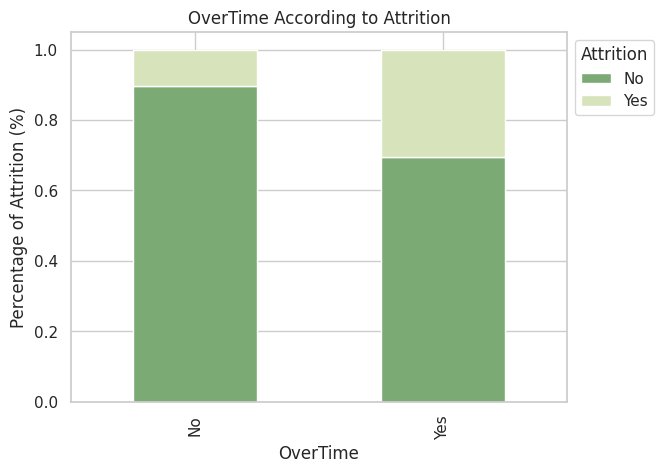

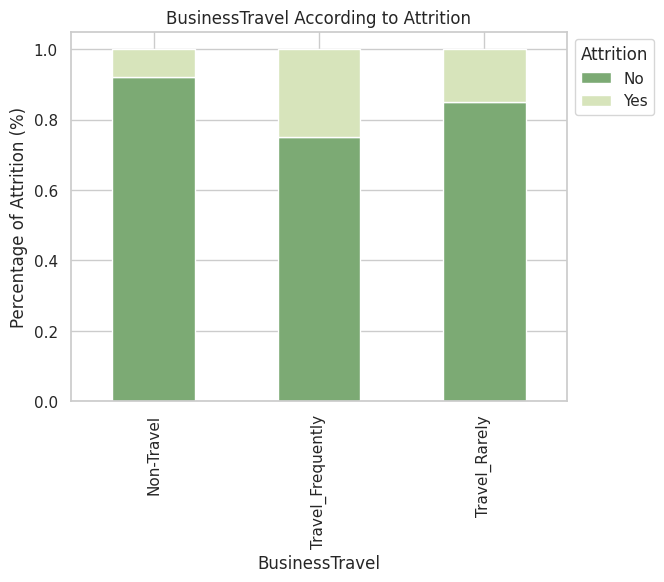

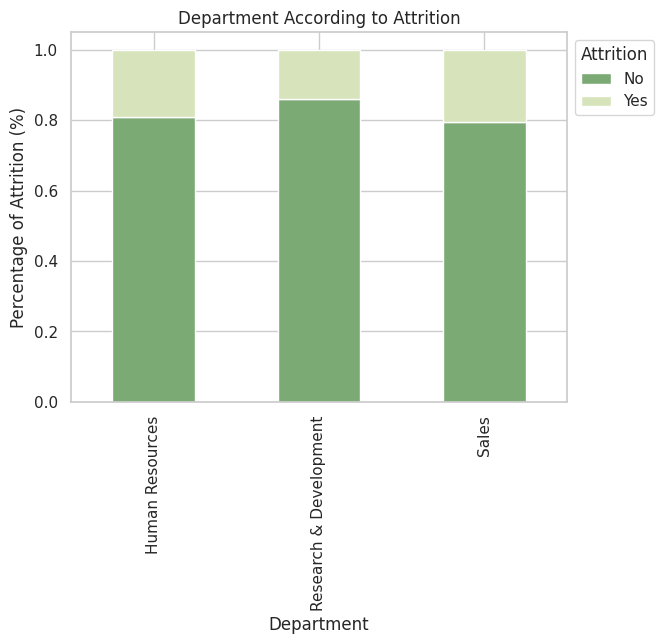

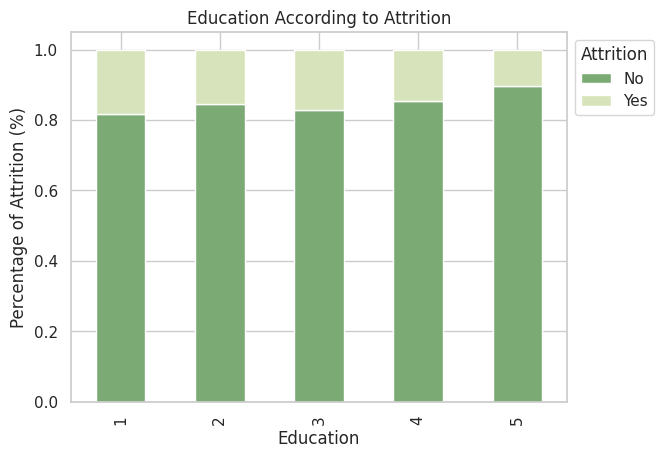

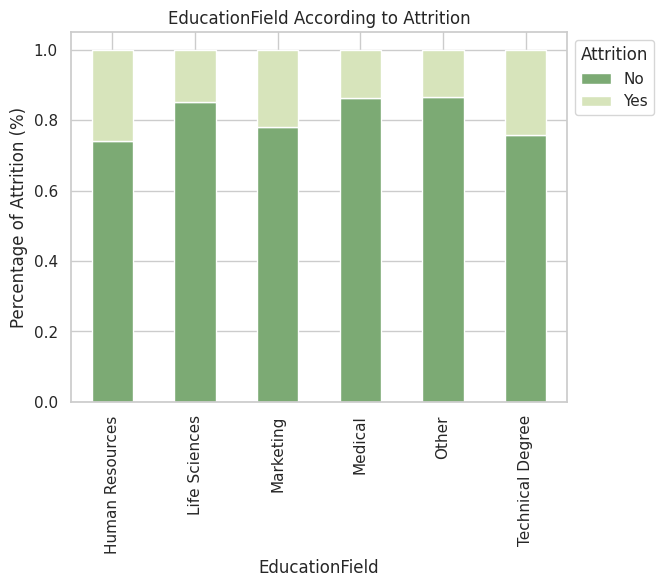

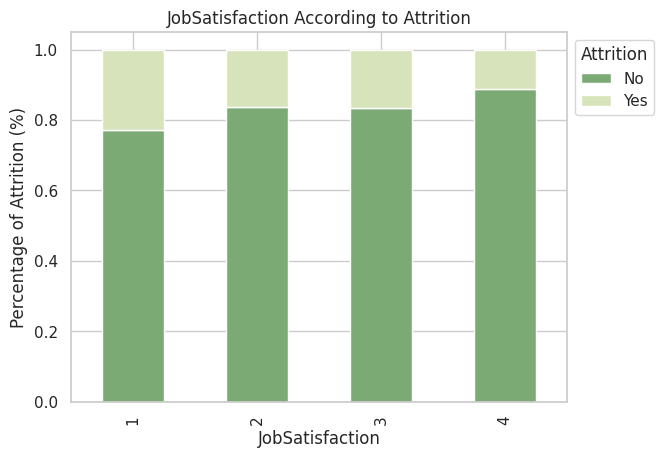

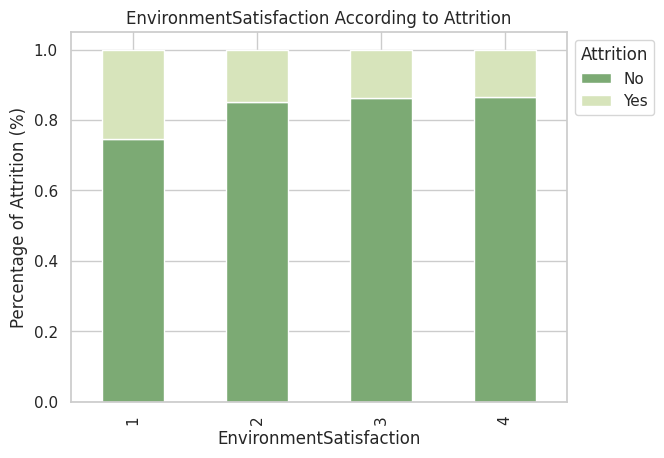

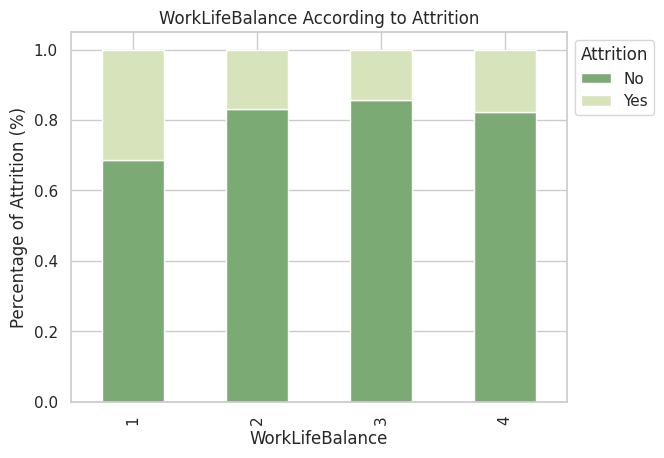

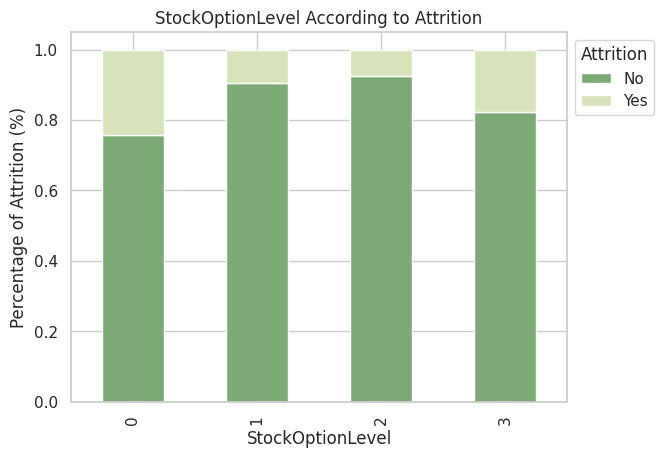

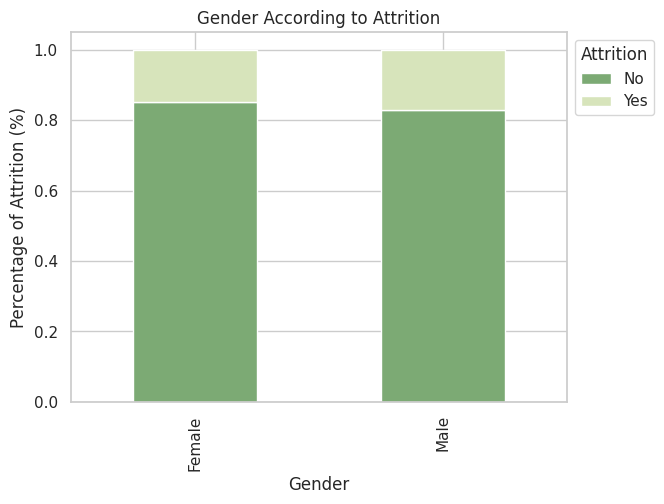

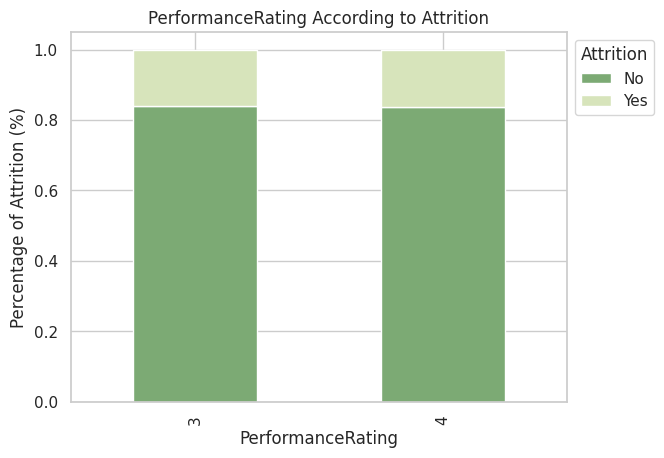

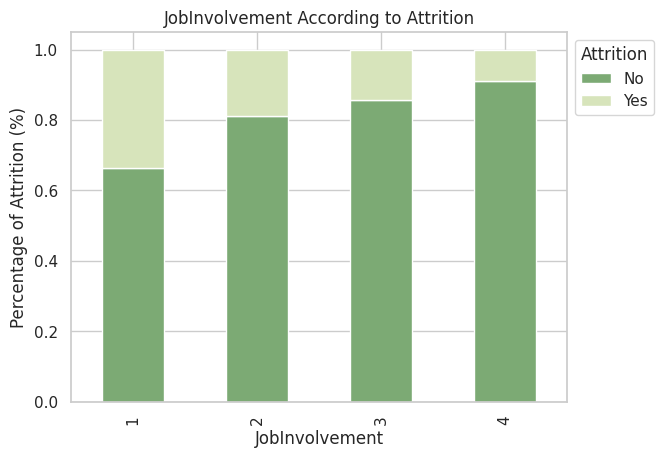

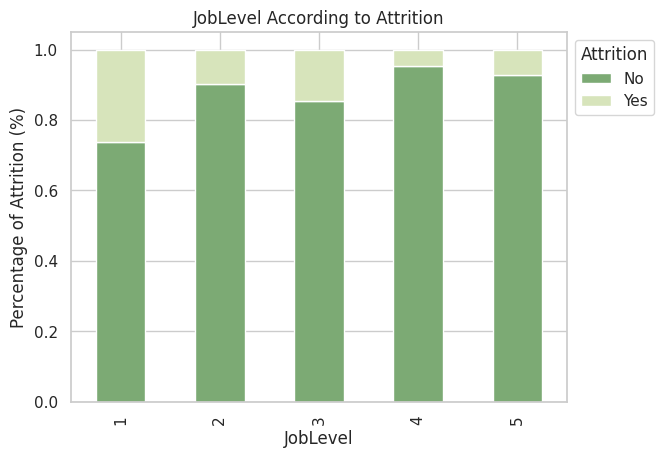

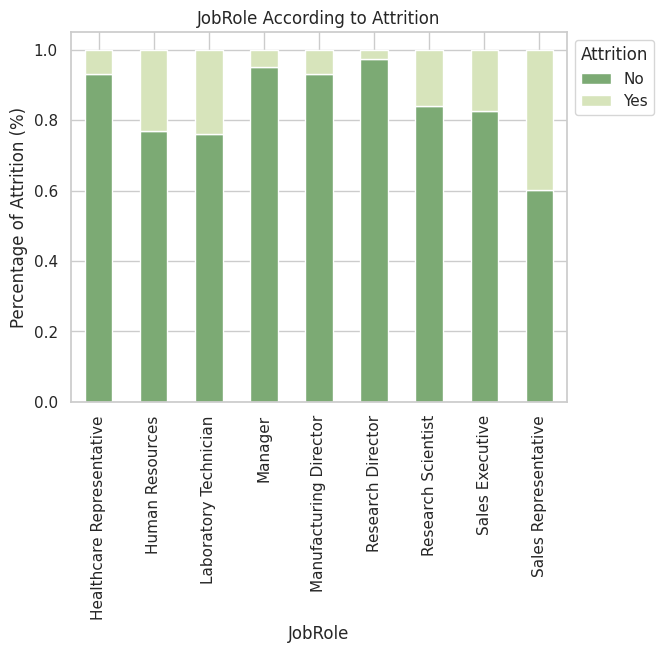

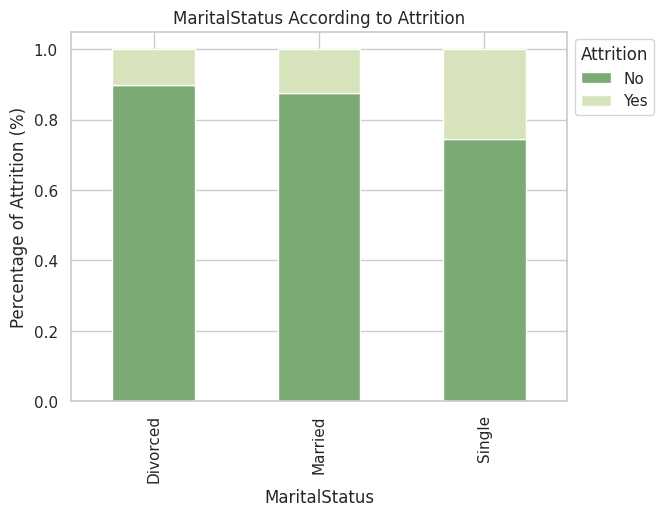

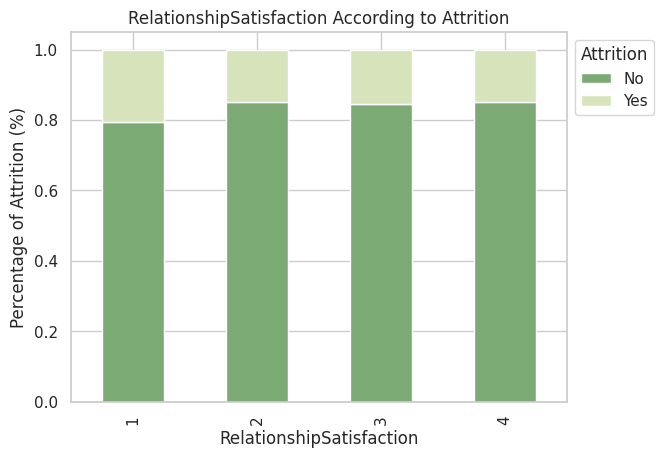

In [ ]:
# Stacked bar (Categories vs. Attrition)

custom_palette = ["#7CAA74", "#D7E4BB"]  # Green shades

sns.set(style="whitegrid")
sns.set_palette(custom_palette)

plt.figure(figsize=(8, 4))

for col in cat_cols:
  if col != 'Attrition':
    #plt.figure()
    data_grouped = df.groupby(col)['Attrition'].value_counts(normalize=True).unstack()
    data_grouped.plot(kind='bar', stacked=True)

    plt.xlabel(col)
    plt.ylabel('Percentage of Attrition (%)')
    plt.title(f'{col} According to Attrition')
    plt.xticks(rotation=90)
    plt.legend(title='Attrition', labels=['No', 'Yes'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    plt.show()


**Observations:**
    
Based on the provided observations, several values or factors appear to have a significant impact on attrition rates within the organization. These factors include:

- **Overtime Work:** employees who work overtime have a notably higher attrition rate, with a greater than 30% chance of quitting compared to the 10% chance for those who do not work overtime. Overtime appears to be a strong predictor of attrition.
- **Job Role:** Sales representatives have the highest attrition rate, approximately 40%, followed by HR and Technicians with attrition rates of around 25%. Job role is a critical factor influencing attrition, with sales roles experiencing the highest turnover.
- **Job Level:** lower job levels, such as Job Level 1, are associated with a higher likelihood of attrition, with an attrition rate of nearly 25%. Job level appears to be another influential factor in attrition, with junior employees having a higher turnover rate.
- **Work-Life Balance:** employees with poor work-life balance ratings, especially those in category 1, exhibit a higher attrition rate, approximately 30%. The quality of work-life balance is a significant contributor to employee retention.

These values and factors are key contributors to attrition within the organization, indicating that addressing issues related to overtime, job roles, labor participation, job levels, and work-life balance could potentially help reduce attrition rates and improve employee retention.

In [ ]:
# Mean of the numerical variables grouped by job attrition
df.groupby(['Attrition'])[num_cols].mean()

,DailyRate,Age,DistanceFromHome,MonthlyIncome,MonthlyRate,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,NumCompaniesWorked,HourlyRate,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear
Attrition,,,,,,,,,,,,,,
No,812.504461,37.561233,8.915653,6832.739659,14265.779400,15.231144,11.862936,7.369019,2.645580,65.952149,4.484185,2.234388,4.367397,2.832928
Yes,750.362869,33.607595,10.632911,4787.092827,14559.308017,15.097046,8.244726,5.130802,2.940928,65.573840,2.902954,1.945148,2.852321,2.624473


**Observations:**

- **Daily Rate:** on average, employees who did not experience attrition have a slightly higher daily rate compared to those who did. This suggests that the daily rate alone may not be a strong predictor of attrition.
- **Age:** employees who experienced attrition tend to be younger on average compared to those who did not. Age can play a role in attrition, with younger employees potentially being more likely to leave. This is common, since younger people tend to have more personal freedom which allows them to change jobs more frequently than older people.
- **Distance from Home:** employees who experienced attrition have, on average, a longer commute distance from home to work compared to those who did not. Longer distance may contribute to attrition.
- **Monthly Income:** employees who did not experience attrition have a significantly higher average monthly income compared to those who did. Lower income levels appear to be associated with attrition.
- **Total Working Years:** employees who did not experience attrition have, on average, more total working years compared to those who did. This suggests that employees with more work experience are less likely to experience attrition.

The mean values show several notable differences between employees who experienced attrition and those who did not. Younger employees with shorter total working years, lower monthly income, and longer commutes seem to be more prone to attrition. This information is really valuable to us since we can use this to predict if a job candidate will experience attrition later on.

Now we are going to present the last four values (the ones who are more associated with attrition) graphically for better understanding.

In [ ]:
# Attrition data values
df_att = df[df.Attrition == "Yes"]

# Non attrition data values
df_not_att = df[df.Attrition == "No"]

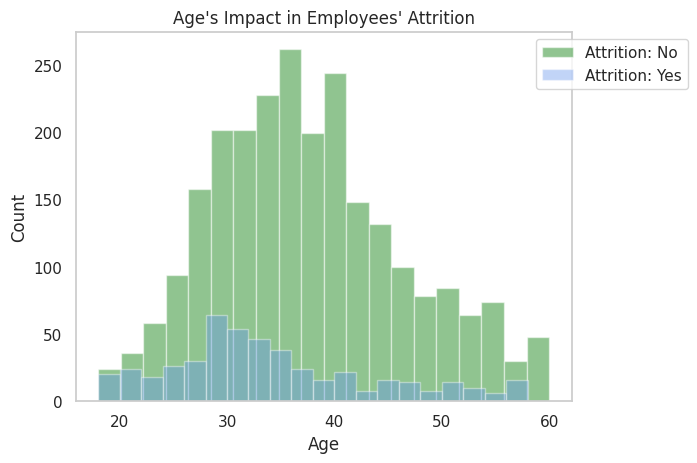

In [ ]:
# Age vs. Attrition

# Create a histogram for employees who resigned
ax = df_not_att.Age.hist(bins=20, alpha=0.5, color="forestgreen", label="Attrition: No")

# Create a histogram for employees who did not resign
df_att.Age.hist(bins=20, alpha=.4, color="cornflowerblue", label="Attrition: Yes", ax=ax)
ax.grid(False)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("Age's Impact in Employees' Attrition")
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))


**Observations:**

- Employee attrition rates are notably higher among employees aged between 28 and 31. This age group experiences a higher turnover rate compared to other age groups within the organization.

- Given the observed higher attrition rates in the 28-31 age group, it becomes intriguing to investigate the specific factors influencing attrition among older employees.

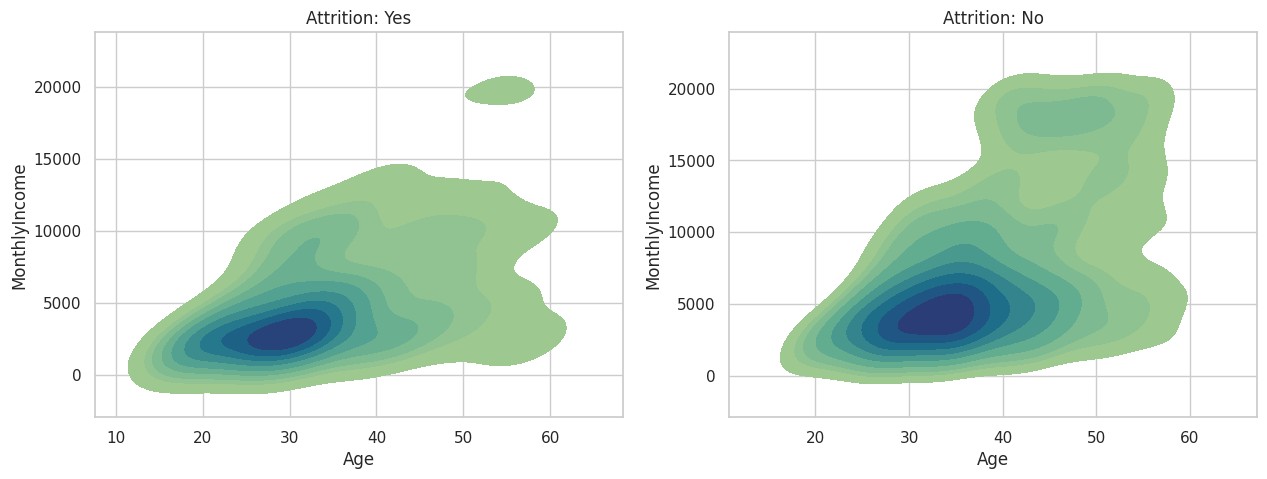

In [ ]:
# How Monthly Income's relationship with Age affects Attrition

fig, axs = plt.subplots(1,2,figsize=(15,5))
#Kde plots show density of observations and smooths the observations into continuity with a Gaussian Kernel estimate.
#This helps us visualize if there are any areas where data converge. In this case, looking for attrition patterns
sns.kdeplot(data=df[df["Attrition"]=="Yes"],x="Age", y="MonthlyIncome", fill=True, ax=axs[0],cmap="crest" )
sns.kdeplot(data=df[df["Attrition"]=="No"],x="Age", y="MonthlyIncome", fill=True, ax=axs[1],cmap="crest" )

# KDE gives you an estimate of how the data is likely to be distributed along the continuous range of values.

axs[0].title.set_text('Attrition: Yes')
axs[1].title.set_text('Attrition: No')


plt.show()

**Observations:**

- From the KDE plot it's noticeable how attrition tends to concentrate among lower ages. This means, employees in the younger age groups exhibit higher attrition rates.


- It's also evident that attrition becomes notably relevant for employees aged 40 and older, particularly when their monthly income falls below $15,000. This observation suggests that attrition rates increase among older employees with lower income levels.

- The KDE plot aligns with a previous observation that there is a positive correlation between age and monthly income. As employees age, their monthly income tends to rise, which can be seen as a general trend.

- Contrary to the trend of monthly income, the KDE plot implies that the lack of promotions on older age does not seem to be a significant factor contributing to attrition. Even though promotions become less frequent as employees age, it does not appear to have a strong impact on attrition rates among older employees.

In summary, the data indicates that monthly income becomes more relevant with age as it relates to attrition. However, the lack of promotions in older age does not seem to be a significant driver of attrition, especially for employees aged 40 and older with lower incomes.

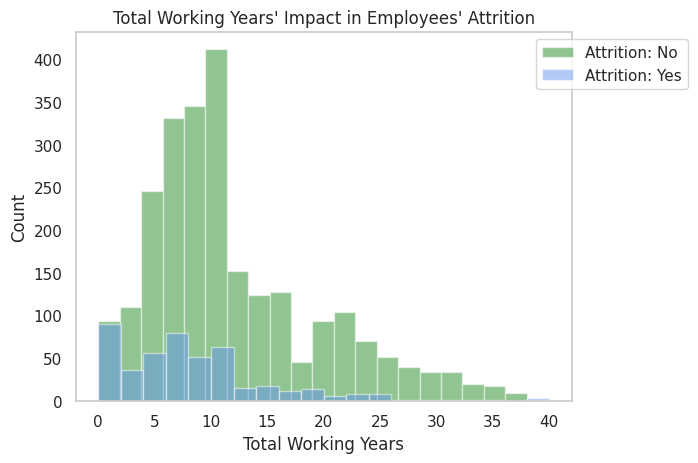

In [ ]:
# Total Working Years vs. Attrition

# Create a histogram for employees who did not resign
ax = df_not_att.TotalWorkingYears.hist(bins=20, alpha=0.5, color="forestgreen", label="Attrition: No")

df_att.TotalWorkingYears.hist(bins=20, alpha=0.5, color="cornflowerblue", label="Attrition: Yes", ax=ax)

ax.grid(False)
ax.set_xlabel("Total Working Years")
ax.set_ylabel("Count")
ax.set_title("Total Working Years' Impact in Employees' Attrition")
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.0))

**Observations**

- Employee's attrition rates are notably higher in the low range of total working years, while they tend to decrease in higher values of working years.

- The data suggests that employees with more work experience are less likely to leave their job.

##**Models**

**How are we going to do this?**

1. Prepare the data for modeling.
2. Split the data into training and testing sets.
3. Build the model on the training data.
4. Fine-tune the model if necessary.
5. Test the data on the testing set.

###**Creating dummy variables for categorical variables.**

In order to see how accurate our model is, we are going to create dummy variables and compare them to the real variables.

In [ ]:
# Creating the list of columns for which we need to create dummy variables
to_get_dummies_for = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus']
   # This pandas function converts categorical data into binary (0|1)
   # Now we can improve our model accuracy and reduce potential biases

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)

# Mapping of Overtime and Attrition variables
dict_OverTime = {'Yes': 1, 'No': 0}
dict_Attrition = {'Yes': 1, 'No': 0}

df['OverTime'] = df.OverTime.map(dict_OverTime)
df['Attrition'] = df.Attrition.map(dict_Attrition)

In [ ]:
# Separating the independent variables from the one to be estimated
Y = df.Attrition
X = df.drop(columns = ['Attrition'])

In [ ]:
X

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,94,4,5993,19479,8,1,11,...,0,0,0,0,0,0,1,0,0,1
1,49,279,8,61,2,5130,24907,1,0,23,...,0,0,0,0,0,1,0,0,1,0
2,37,1373,2,92,3,2090,2396,6,1,15,...,0,1,0,0,0,0,0,0,0,1
3,33,1392,3,56,3,2909,23159,1,1,11,...,0,0,0,0,0,1,0,0,1,0
4,27,591,2,40,2,3468,16632,9,0,12,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,884,23,41,4,2571,12290,4,0,17,...,0,1,0,0,0,0,0,0,1,0
2936,39,613,6,42,1,9991,21457,4,0,15,...,0,0,0,0,0,0,0,0,1,0
2937,27,155,4,87,2,6142,5174,1,1,20,...,0,0,0,1,0,0,0,0,1,0
2938,49,1023,2,63,2,5390,13243,2,0,14,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int64

###**Scaling data**

The independent variables in this dataset have different ranges. When features have different scales, there is a possibility that greater weight is given to features with higher magnitudes, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes can be equally or even more significant. This will affect the performance of our machine learning algorithm, and we do not want our algorithm to be biased toward one feature.

The solution to this problem is **Feature Scaling**, which means scaling the dataset to give each transformed variable a comparable scale.

In this problem, we will use the **Standard Scaler** method, which centers and scales the dataset using the Z-Score.

Standardize the features by subtracting the mean and scaling it to have unit variance.

The standard score of the sample x is calculated as:

**z = (x - u) / s**

Where "u" is the mean of the training samples (zero) and "s" is the standard deviation of the training samples.


In [ ]:
# Scaling our data
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

###**Splitting the data into two sets, one for training and one for testing**

Some classification problems may exhibit a significant imbalance in the distribution of the target classes; for example, there could be several times more negative samples than positive samples. In such cases, it is recommended to use the **stratified sampling** technique to ensure that the relative class frequencies are approximately preserved in each training and validation fold.

In [ ]:
# Divide our data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1, stratify = Y)

# We used a test_size = 0.3. This value means that 30% of the data will be
# used for testing, and the remaining 70% will be for training.

# random_state = 1, ensures that if we run the same code with the same
# random_state value again, we'll get the same random split.
# This is useful for consistency when comparing results.

# We have stratify = Y to help maintain the same proportion of classes
# in each subset as in the original dataset

# After running this code, we'll have four new variables:
# x_train, x_test, y_train and y_test


In [ ]:
x_test
# Now we can see our scalated data.
# x_test shows a subset (30%) of our original feature matrix -> X_scaled

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
2880,0.336849,-0.888723,-0.887515,1.284725,-0.660853,-0.175493,-1.413154,0.122861,-0.628241,-0.330589,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565
1946,-1.415181,0.050857,0.963398,1.383138,-0.660853,-0.929792,-0.732654,-0.678049,-0.628241,1.582663,...,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
1678,0.336849,0.864003,-0.023755,-0.142264,1.153254,-0.345688,-0.009993,2.525591,-0.628241,-0.330589,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
1163,0.008343,1.654836,0.099639,0.251388,-0.660853,-0.545418,-0.612773,-0.678049,-0.628241,-1.150554,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565
1842,-0.210661,-0.117722,-0.023755,1.530758,-0.660853,0.007876,0.714074,2.525591,-0.628241,1.036019,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-1.086676,0.903668,-0.640727,0.497421,0.246200,-0.846925,-1.560722,-0.678049,-0.628241,-1.150554,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.918921,-0.685565
629,-0.977174,0.908626,-0.147150,-0.142264,1.153254,-0.332939,1.356487,-0.678049,-0.628241,-0.603911,...,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565
999,0.555852,0.854086,0.099639,-1.716872,-1.567907,2.187695,0.323651,-1.078504,-0.628241,-0.330589,...,-0.191498,-0.462464,3.662208,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
309,-0.648668,-0.276384,-0.517332,0.989486,1.153254,-0.357374,-0.595346,-1.078504,1.591746,-0.877232,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565


###**Model Evaluation Criteria**

**The model can make two types of incorrect predictions:**

1. Predicting that an employee will leave when the employee doesn't resign.
2. Predicting that an employee won't leave when the employee actually leaves the company.

**Which case is more important?**

- Predicting that the employee won't leave but the employee does leave, meaning losing a valuable employee or asset. This would be considered a significant error for any employee churn predictor and is, therefore, the most crucial case of incorrect predictions.

**How to reduce this loss, meaning, how to reduce false negatives?**

The company would want to **maximize the Recall**, the higher the Recall, the greater the chances of minimizing false negatives. Therefore, the focus should be on increasing Recall (minimizing false negatives) or, in other words, identifying true positives (e.g.: Class 1) very effectively so that the company can provide incentives to manage the churn rate, especially for the top performers. This would help optimize the overall cost of the project to retain the best talents.

In [ ]:
# We use "metrics_score", a python function that takes two arguments: actual and predicted.
# This helps us evaluate the performance of a classification model by generating and displaying various classification metrics.

def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    # It shows the number of true positives, true negatives,
    # false positives, and false negatives.

    plt.figure(figsize = (8, 5))

    labels = np.asarray([['TN', 'FP'], ['FN', 'TP']]) #labels for the values in the heatmap

    custom_palette = sns.light_palette("green", as_cmap=True)

    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Attrite', 'Attrite'],
                yticklabels=['Not Attrite', 'Attrite'], annot_kws={"size": 12},
                cmap=custom_palette)
    # We'll create a heatmap visualization of the confusion matrix in order to understand it better

    for i in range(2):
        for j in range(2):
            label_color = 'black'
            if labels[i, j] == 'TN':
                label_color = 'white'
            plt.text(j + 0.5, i + 0.75, labels[i, j], horizontalalignment='center', verticalalignment='center', fontsize=12, color=label_color)

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    legend_labels = {'TP': 'True Positive', 'TN': 'True Negative', 'FP': 'False Positives', 'FN': 'False Negatives'}
    legend_colors = {'TP': 'white', 'TN': 'white', 'FP': 'white', 'FN': 'white'}
    legend_handles = [plt.Rectangle((0,0),1,1,color=legend_colors[label]) for label in legend_labels.keys()]
    # In this line of code, we are creating a list of legend handles,
    # which are graphical objects that represent the labels and colors in the legend.
    plt.legend(legend_handles, [f'{label} = {legend_labels[label]}' for label in legend_labels.keys()], loc='upper left', bbox_to_anchor=(1.30, 1.0), frameon=False)

    plt.show()


### **Model 1: Logistic Regression.**

https://cienciadedatos.net/documentos/py10-regresion-lineal-python

Logistic regression is a supervised learning algorithm typically used for **binary classification** problems, where the dependent variable is categorical and has only two possible values. In logistic regression, we use the sigmoid function to calculate the probability of an event Y, given some features X such as:

$P(Y) = \frac{1}{1 + e^{-X}}$

In [ ]:
# Adjusting the model

lg = LogisticRegression() # create a logistic regression

lg.fit(x_train,y_train) # we use this to trains the logistic regression model using the training data

LogisticRegression()

**Evaluation Model 1**

**Measures:**
- **Precision:** this tells us how many of the predicted positive instances were actually positive.
- **Recall:** this measure shows us how many of the actual positive instances were correctly predicted as positive.
- **F1-score:** this gives us the mean of precision and recall and provides a balance between the two metrics.
- **Accuracy:** it measures the overall correctness of the model's predictions.
  - It is the ratio of correctly predicted instances to the total number of instances.
- **Macro Avg and Weighted Avg:** these rows provide average values for precision, recall, and F1-score.


---


**Classes:**
- **Class 0:** Employees who didn't resign
  - Attrition = 'No'
- **Class 1:** Employees who resigned
  - Attrition = 'Yes'

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1726
           1       0.81      0.50      0.62       332

    accuracy                           0.90      2058
   macro avg       0.86      0.74      0.78      2058
weighted avg       0.89      0.90      0.89      2058



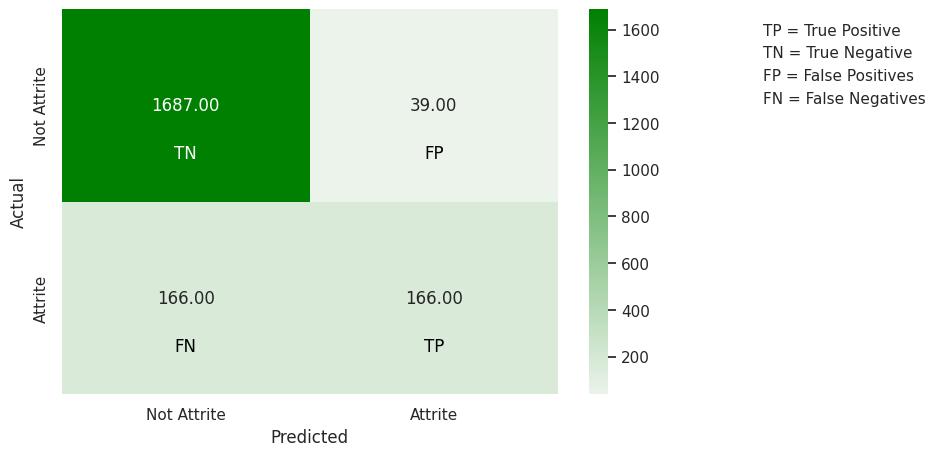

In [ ]:
# Evaluation

y_pred_train = lg.predict(x_train)
metrics_score(y_train, y_pred_train)

# The predict method of a machine learning model takes input data (x_train in this case)
# and generates predicted output labels or values (y_pred_train in this case).
# These predicted labels are based on the model's learned patterns from the training data.

**Table Analysis**

**Precision:**
- Class 0 = 0.91. Out of all the employees predicted as not resigning (no attrition), 91% were correctly classified; this means a **low rate of false positives**.
- Class 1 = 0.81. Out of all the employees predicted as resigning (yes attrition), 81% were correctly classified; this means there are **some false positives** in this prediction that we should take into account.

**Recall:**
- Class 0 = 0.98. Out of all the employees who actually didn't resign (no attrition), 98% were correctly identified; this suggests a **high rate of true negatives**.
- Class 1 = 0.50. Only 50% of the employees who actually resigned (yes attrition) were correctly identified; this indicates that there are **many false negatives**.

**F1-Score:**
- Class 0 = 0.94. It's a high value, this means it balances the trade-off between precision and recall, suggesting overall **good performance**.
- Class 1 = 0.62. We also have a relatively good balance between precision and recall, nevertheless, we can see in our previous values that **recall is relatively low** compared to precision.

**Accuracy:**
- Since our accuracy is 0.90, we can tell that our model correctly predicted 90% of all instances in the dataset.

**Macro Avg**
- We got a value of 0.78, suggesting an overall performance assessment across both classes.

**Weighted Avg**
- In this case it has a value of 0.89, which is slightly higher than the macro-average due to the **higher support for Class 0**.



**Heatmap Analysis**

**True Positives (TP): 166**
- This means that 166 employees who actually resigned (Attrition) were correctly predicted as such by the model.

**True Negatives (TN): 1687**
- This means that 1687 employees who actually didn't resign (No Attrition) were correctly predicted as such by the model.

**False Positives (FP): 39**
- This means that 39 employees who actually didn't resign (No Attrition) were incorrectly predicted as if they had resigned (Attrition). These are false alarms or Type I errors.

**False Negatives (FN): 166**
- This means that 166 employees who actually resigned (Attrition) were incorrectly predicted as if they hadn't resigned (No Attrition). These are cases where the model failed to identify actual resignations, also known as Type II errors.

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       740
           1       0.76      0.46      0.58       142

    accuracy                           0.89       882
   macro avg       0.83      0.72      0.76       882
weighted avg       0.88      0.89      0.88       882



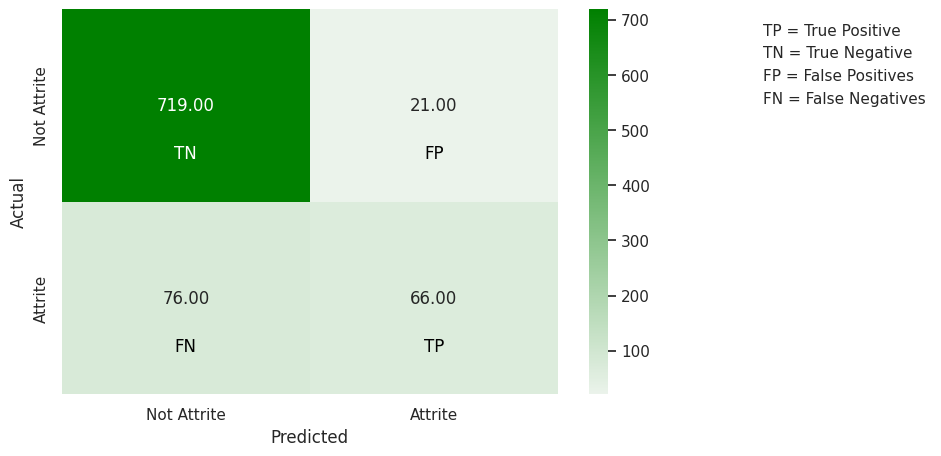

In [ ]:
# Checking with the test data

y_pred_test = lg.predict(x_test)
metrics_score(y_test, y_pred_test)

**Observations:**

Model #1 appears to have good accuracy (around 90% on the training and test datasets) and precision for employees who didn't resign (Class 0), correctly identifying most of them. However, it has room for improvement in recall for employees who resigned (Class 1), as it's only capturing 50% (in the training data) and 46% (in the test data) of actual resignations, and there are false negatives in this prediction. This makes us think that we need to fine-tune the model to improve its performance for Class 1, since it won't perform well for our project's objective, which is identifying employees at risk of attrition.

**Let's review the coefficients and find out which variables lead to attrition and which ones can help reduce attrition**

In [ ]:
# Printing Logistic Regression Coefficients

cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
OverTime,0.958034
BusinessTravel_Travel_Frequently,0.716046
MaritalStatus_Single,0.618145
YearsSinceLastPromotion,0.552935
YearsAtCompany,0.523238
NumCompaniesWorked,0.501137
Department_Sales,0.483346
Department_Research & Development,0.482820
BusinessTravel_Travel_Rarely,0.441384
DistanceFromHome,0.384346


**Observations:**

The features that **positively affect attrition rate** are:

- OverTime
- BusinessTravel_Travel_Frequently
- Department_Research & Development
- JobRole_Sales Executive
- MaritalStatus_Single
- Department_Sales
- NumCompaniesWorked
- YearsSinceLastPromotion
- JobLevel_5
- BusinessTravel_Travel_Rarely
- DistanceFromHome
- YearsAtCompany
- JobRole_Human Resources
- JobRole_Sales Representative


The features that **negatively affect attrition** rate are:

- MonthlyIncome
- JobInvolvement_3
- JobLevel_2
- EnvironmentSatisfaction_4
- JobInvolvement_4
- JobInvolvement_2
- EnvironmentSatisfaction_3
- EducationField_Life Sciences
- EnvironmentSatisfaction_2
- YearsWithCurrManager
- JobRole_Research Director
- TotalWorkingYears
- JobSatisfaction


The coefficients of the logistic regression model provide us with the logarithm of probabilities, which can be challenging to interpret in the real world. We can convert the logarithm of probabilities into probabilities by taking their exponential values.

In [ ]:
odds = np.exp(lg.coef_[0]) # Finding the odds

# Add the probabilities to a DataFrame and sort the values.
pd.DataFrame(odds, x_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

,odds
OverTime,2.606567
BusinessTravel_Travel_Frequently,2.046326
MaritalStatus_Single,1.855483
YearsSinceLastPromotion,1.738348
YearsAtCompany,1.687483
NumCompaniesWorked,1.650597
Department_Sales,1.621491
Department_Research & Development,1.620638
BusinessTravel_Travel_Rarely,1.554858
DistanceFromHome,1.468653


**Observations:**

- The probabilities of an employee working overtime until attrition are **2.6 times** the probabilities of not working overtime, possibly because working overtime is not sustainable over an extended period for any employee and can lead to burnout and job dissatisfaction.
- The probabilities of an employee frequently traveling for attrition are **twice as high** as those of an employee who does not travel as frequently.
- The probabilities of single employees leaving are approximately **1.85 times** (85% higher than) the probabilities of an employee with a different marital status.

**Precision-Recall Curve for logistic regression**

The Precision-Recall Curve is a graphical representation used in machine learning and information retrieval to evaluate the performance of classification models.

The Precision-Recall Curve is created by varying the threshold used for classifying instances as positive or negative. Each threshold results in a different trade-off between precision and recall. The curve is constructed by plotting precision on the y-axis and recall on the x-axis as the threshold changes.

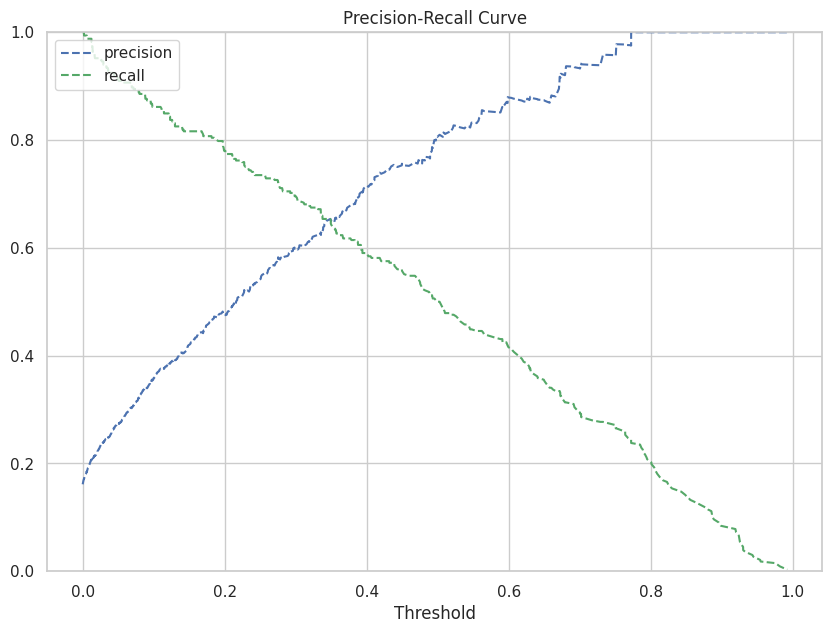

In [ ]:
y_scores_lg = lg.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class


precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.title('Precision-Recall Curve')

plt.ylim([0, 1])

plt.show()

**Observations:**
- We can see that precision and recall are balanced for a **threshold of around 0.35**.

**Let's look at the model's performance at this threshold**

Check: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1726
           1       0.65      0.64      0.64       332

    accuracy                           0.89      2058
   macro avg       0.79      0.79      0.79      2058
weighted avg       0.89      0.89      0.89      2058



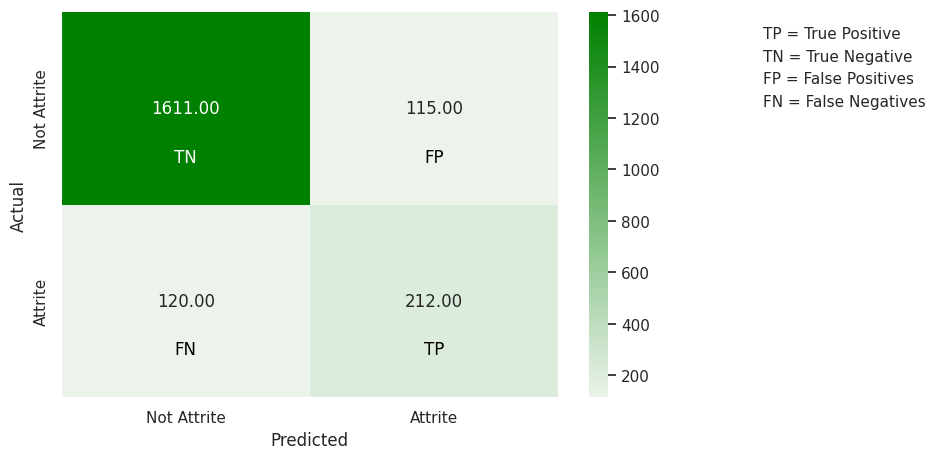

In [ ]:
optimal_threshold1 = .35
# This variable stores the chosen threshold value, which is set to 0.35 in this case.
# This threshold value is used to make binary predictions based on the predicted probabilities
# generated by the logistic regression model.

y_pred_train = lg.predict_proba(x_train)
# Here we store the predicted probabilities for the positive class (Class 1)
# generated by the logistic regression model when applied to the training data

metrics_score(y_train, y_pred_train[:, 1] > optimal_threshold1)
# Now we calculate the model's performance metrics based on the chosen threshold.

**Observations:**

The model's performance has **improved**. Attrition has increased for class 1 (from 0.50 to 0.64).

**Now lets check the performance on the test data.**

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.62      0.63      0.63       142

    accuracy                           0.88       882
   macro avg       0.78      0.78      0.78       882
weighted avg       0.88      0.88      0.88       882



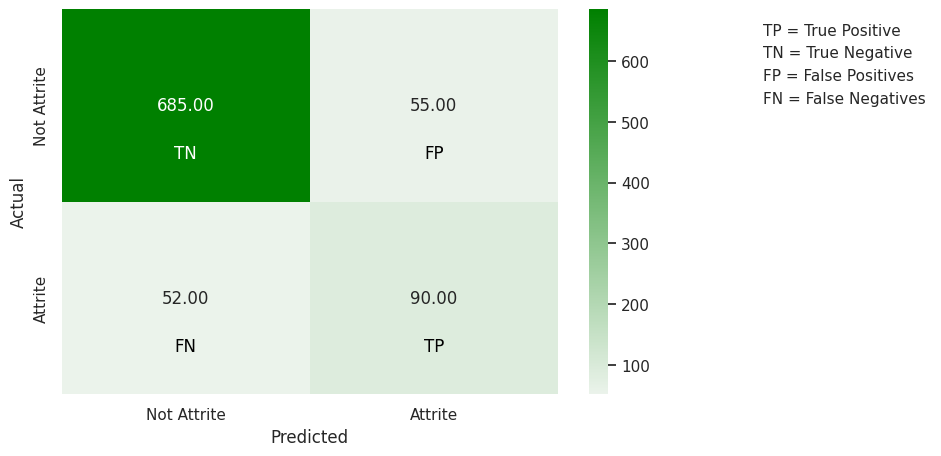

In [ ]:
optimal_threshold1 = .35

y_pred_test = lg.predict_proba(x_test)

metrics_score(y_test, y_pred_test[:, 1] > optimal_threshold1)

**Observations:**

- The model is showing **similar performance on both the test and training datasets**, indicating generalized performance.
- **The recall on the test data has increased**, while at the same time, precision has slightly decreased, which is expected when adjusting the threshold.
- The model's average recall and precision are good, but let's see if we can achieve even better performance with other algorithms.


Check: https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

####**Individual Prediction (LR)**

To confirm that the model is working correctly, we take the data from the dependent and independent variables of the first record in the test set and make a prediction with the model using only that first record to see if it works.

In [ ]:
x_test

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
2880,0.336849,-0.888723,-0.887515,1.284725,-0.660853,-0.175493,-1.413154,0.122861,-0.628241,-0.330589,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565
1946,-1.415181,0.050857,0.963398,1.383138,-0.660853,-0.929792,-0.732654,-0.678049,-0.628241,1.582663,...,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
1678,0.336849,0.864003,-0.023755,-0.142264,1.153254,-0.345688,-0.009993,2.525591,-0.628241,-0.330589,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
1163,0.008343,1.654836,0.099639,0.251388,-0.660853,-0.545418,-0.612773,-0.678049,-0.628241,-1.150554,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565
1842,-0.210661,-0.117722,-0.023755,1.530758,-0.660853,0.007876,0.714074,2.525591,-0.628241,1.036019,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-1.086676,0.903668,-0.640727,0.497421,0.246200,-0.846925,-1.560722,-0.678049,-0.628241,-1.150554,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.918921,-0.685565
629,-0.977174,0.908626,-0.147150,-0.142264,1.153254,-0.332939,1.356487,-0.678049,-0.628241,-0.603911,...,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565
999,0.555852,0.854086,0.099639,-1.716872,-1.567907,2.187695,0.323651,-1.078504,-0.628241,-0.330589,...,-0.191498,-0.462464,3.662208,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
309,-0.648668,-0.276384,-0.517332,0.989486,1.153254,-0.357374,-0.595346,-1.078504,1.591746,-0.877232,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565


In [ ]:
#  Extract the data for a single individual from our test dataset

x_individual_pred = x_test.head(1)
x_individual_pred

,Age,DailyRate,DistanceFromHome,HourlyRate,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
2880,0.336849,-0.888723,-0.887515,1.284725,-0.660853,-0.175493,-1.413154,0.122861,-0.628241,-0.330589,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565


In [ ]:
y_test.head(1)

2880    0
Name: Attrition, dtype: int64

In [ ]:
# Here we use our trained logistic regression model (lg) to predict the probabilities of class
# membership for a specific individual's data, represented by "x_individual_pred variable".

y_pred_test_individual = lg.predict_proba(x_individual_pred)
y_pred_test_individual

array([[0.98902613, 0.01097387]])

In [ ]:
print("Probability Of No Attrition: ", y_pred_test_individual[0][0]*100 , "%")
print("Probability Of Attrition: ", y_pred_test_individual[0][1]*100 , "%")

Probability Of No Attrition:  98.90261258775513 %
Probability Of Attrition:  1.0973874122448632 %


**Observations:**

After analyzing these results, we can see that the model predicted that record "2880" has a 1% probability of resigning and a 98% probability of not resigning. This is correct because if we look at the first record of the independent variable, we can see that record "2880" has a 0, which means that the employee did not actually resign.

This means our model worked well on predicting if this specific employee will resign or not.

### **Model 2: LDA (Linear Discriminant Analysis)**

https://www.cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda

Linear Discriminant Analysis (LDA) is a supervised learning algorithm used for classification tasks in machine learning.
The purpose of Discriminant Analysis is to classify objects (people, customers, things, etc.) into one of two or more groups based on a set of features that describe the objects (e.g. gender, age, income, weight, preference score, etc.).
Soo this is perfect for our project, we need to classify employees, whether they will quit or not. Using all the variables.

Linear Discriminant Analysis (LDA) as stated before it is generally used to classify patterns between two classes; however, it can be extended to classify multiple patterns. LDA assumes that all classes are linearly separable, and accordingly, multiple linear discrimination functions representing various hyperplanes in feature space are created to distinguish between the classes. If there are two classes, then the LDA draws a hyperplane and projects the data onto this hyperplane in such a way as to maximize the separation of the two categories. This hyperplane is created according to two criteria considered simultaneously:

- Maximization of the distance between the means of two classes.
- Minimize the variation between each category.
- Minimizing the variation between each category.

In [ ]:
# Fitting the LDA model
lda = LinearDiscriminantAnalysis()

lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

**Checking Model Performance**

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1726
           1       0.80      0.52      0.63       332

    accuracy                           0.90      2058
   macro avg       0.86      0.75      0.78      2058
weighted avg       0.89      0.90      0.89      2058



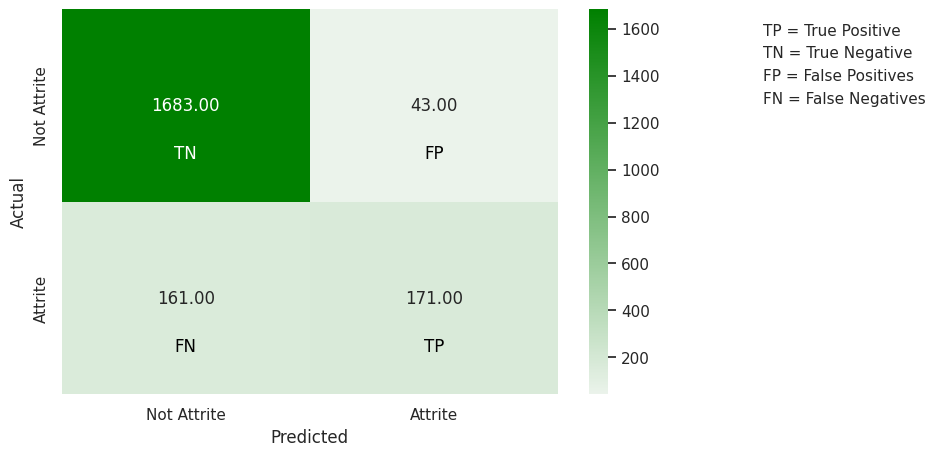

In [ ]:
# Checking model performance of LDA
y_pred_train_lda = lda.predict(x_train)

metrics_score(y_train, y_pred_train_lda)

- The reported average includes the macro average that averages the unweighted average per label and the weighted average that averages the media weighted average per label.
- In classification, the class of interest is considered the positive class. Here, the interest class is 1, that is, to identify employees at risk of burnout.

**Reading the confusion matrix (clockwise from top left):**

* Negative true (actual = 0, predicted = 0): the model predicts that an employee would not quit and the employee would not quit

* False positive (actual = 0, predicted = 1): the model predicts that an employee would quit but the employee does not quit

* True positive (actual = 1, predicted = 1): the model predicts that an employee would quit, and the employee actually quits

* False Negative (Actual = 1, Predicted = 0): The model predicts that an employee would not quit but the employee would quit

**Observations:**

The model is performing well in terms of accuracy.
Withdrawal for class 1 is quite low, which implies that this model will not work well to differentiate between employees who have a high probability of leaving the company, and therefore this model would not help to reduce the attrition rate.
The model is giving a decent average recall. A recall of ~0.75 suggests that there is a 25% (1 - 0.75) chance that the model will predict that a person will leave even if they don't, and the company will waste its time and energy on these employees. They are not at risk of dropping out.

We have built the LDA model. **Now, let's review the coefficients and find out which variables lead to dropout and which ones can help reduce dropout.**

In [ ]:
# Column name list
cols = X.columns

# LDA model coefficients
coef_lda = lda.coef_

# print coefficients
pd.DataFrame(coef_lda, columns = cols).T.sort_values(by = 0, ascending = False)

,0
OverTime,1.041698
Department_Research & Development,0.795546
Department_Sales,0.649234
BusinessTravel_Travel_Frequently,0.583047
MaritalStatus_Single,0.565419
NumCompaniesWorked,0.456036
JobRole_Sales Executive,0.406011
YearsSinceLastPromotion,0.353791
YearsAtCompany,0.351596
JobRole_Human Resources,0.342187


**Some characteristics that positively affect the Attrition rate are:**
- Over time
- Department_Research and Development
-BusinessTravel_Travel_Frequently
- Department_Sales
- Marital status single
-BusinessTravel_Travel_Rarely
- NumEmpresasTrabajadas
- Years since the last promotion
- Job_Human resources
- JobRole_Sales Executive
- Years in the company
- DistanceFromHome

**Some characteristics that negatively affect the Attrition rate are:**
- Participation at work_3
- EducationField_Life Sciences
- Participation at work_2
- Monthly income
-EducationField_Medical
- Participation at work_4
-JobLevel_2
- Environmental Satisfaction_4
- Environmental Satisfaction_3
- Environmental Satisfaction_2
- Work satisfaction

**Observations:**

- Based on the LDA model, **overtime is the most important function** to detect if an employee would quit or not.
- **This model also suggests that attrition depends on the employee's department.**
- **Business travel is an important variable in predicting the attrition rate.** Employees who travel a lot or rarely, have a higher attrition rate. This could be because those who travel frequently may feel overworked and dissatisfied with their role, while employees who travel infrequently (in an organization where almost 90% of all employees, travel) could be a sign of that they feel undervalued and disinterested and therefore lose more.
- **The number of companies the employee has worked for in the past also seems to affect the likelihood of leaving**. The higher the number, the greater the chance that the employee will quit. This suggests that employees who have worked for a larger number of companies are not likely to be loyal and continue to change companies.
- Other characteristics that seem to affect the chances of leaving are the number of years in the current company and the distance from home, both of which have positive correlations with the probability of leaving.
- Job involvement characteristics that are negatively correlated with attrition mean that **employees who are more involved in their jobs tend to drop out less.** This could probably be because a high degree of job involvement can make that employees feel that they are more important to the company, and therefore discourage them from attrition.
- The model also captures the **inverse relationship between earnings and attrition**, which suggests that attrition rates can be controlled by increasing the salary of employees.
- **Employees who are satisfied with the organization's environment and culture are less likely to churn**, a conclusion that makes sense since a good work environment is likely to keep employees happy and prevent them from leaving work.
- **Employees with more total work experience and a good position in the organization are also less likely to leave**, probably because working in the organization for several years and/or holding a good position tends to promote job stability and discourages volatility .

## Optimizing Our LDA Model


### **Recall and precision curve for LDA**

The Precision-Recall curve summarizes the trade-off between precision and recall for a predictive model using different probability thresholds.

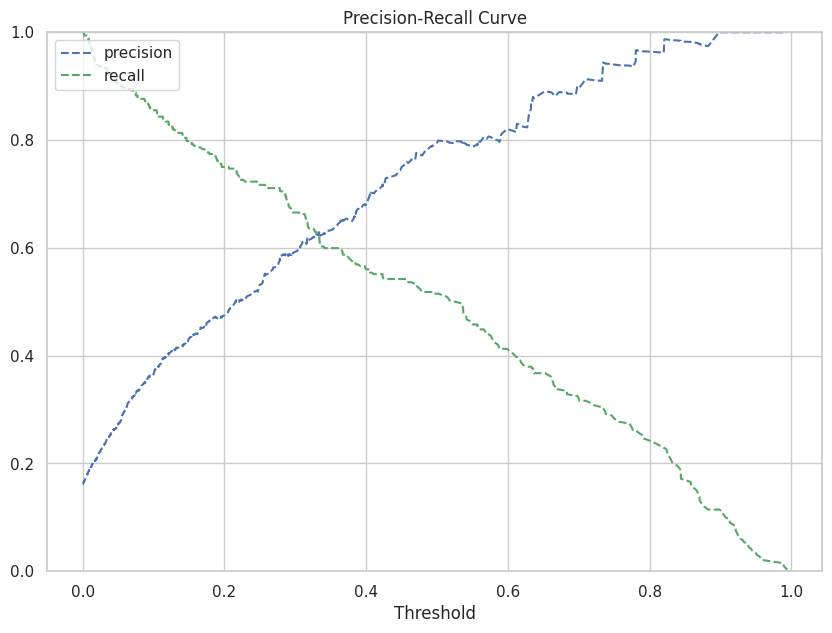

In [ ]:
y_scores_lda = lda.predict_proba(x_train) # predict_proba gives the probability of each observation belonging to each class

precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plot precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.title('Precision-Recall Curve')

plt.ylim([0, 1])

plt.show()

**Observation:**

- We can see that precision and recall are balanced for a threshold of around ~0.35.

**Let's see how the model performs at this threshold**

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1726
           1       0.63      0.60      0.62       332

    accuracy                           0.88      2058
   macro avg       0.78      0.77      0.77      2058
weighted avg       0.88      0.88      0.88      2058



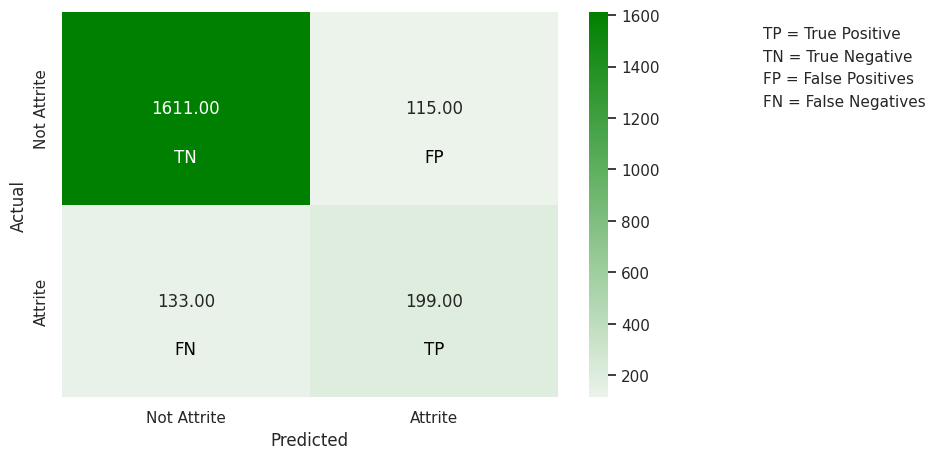

In [ ]:
optimal_threshold1 = .35

y_pred_train_lda = lda.predict_proba(x_train)

metrics_score(y_train, y_pred_train_lda[:,1] > optimal_threshold1)

**Observations:**

- Accuracy has decreased but **recovery for class 1 has increased to 0.60**.
- **The model is capable of identifying the majority of employees who are at risk of leaving** and would therefore be a more useful model than the previous iteration with the default threshold.

Let's check the performance of the model on the test data.

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       740
           1       0.63      0.61      0.62       142

    accuracy                           0.88       882
   macro avg       0.78      0.77      0.78       882
weighted avg       0.88      0.88      0.88       882



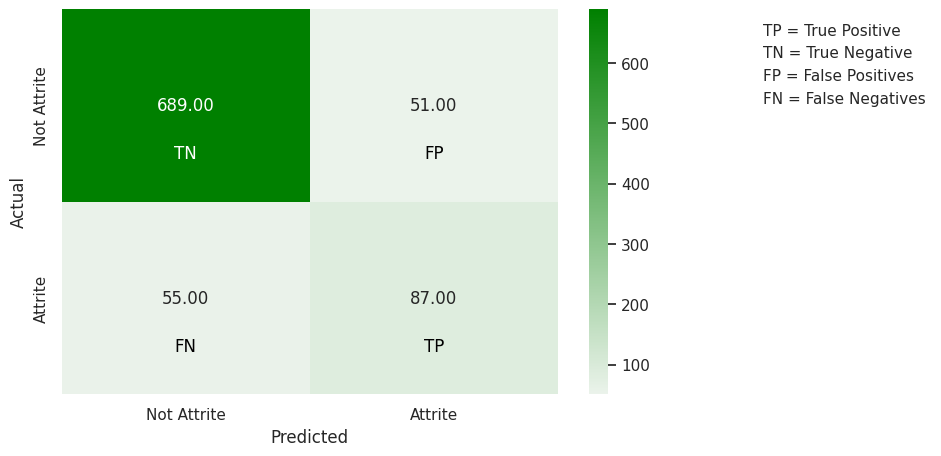

In [ ]:
# testing the model with the test data
optimal_threshold1 = .35

y_pred_test_lda = lda.predict_proba(x_test)

metrics_score(y_test, y_pred_test_lda[:,1] > optimal_threshold1)

**Observations:**

- The model is giving **similar performance on the test and training data**, which means that the model has generalized well.
-**Average recall and model accuracy are good**, we could use another discriminant analysis (QDA) or another model entirely (KNN, Decision Tree, SVM) and see if we get better results, but unfortunately that's not the scope of the project. Time is of the essence and rabbit holes are dangerous, we will use the comparison between these 2 models and elaborate our conclusions.

####**Individual Prediction (LDA)**

In [ ]:
x_individual_pred = x_test.head(1)
y_pred_test_individual = lda.predict_proba(x_individual_pred)
y_pred_test_individual
print("Probability Of No Attrition: ", y_pred_test_individual[0][0]*100 , "%")
print("Probability Of Attrition: ", y_pred_test_individual[0][1]*100 , "%")

Probability Of No Attrition:  99.17888611406275 %
Probability Of Attrition:  0.8211138859372507 %


**Observations:**

The individual prediction tells us that the applicant had 99.18% probability of not quitting later on. This is the same outcome that our prediction using Linear Regression had. Never the less, this seems to be a little bit more accurate.

Model 1: Linear Regression
- Probability Of No Attrition:  98.90261258775513 %
- Probability Of Attrition:  1.0973874122448632 %

Model 2: Linear Discriminant Analysis
- Probability Of No Attrition:  99.17888611406275 %
- Probability Of Attrition:  0.8211138859372507 %


## General Results
After comparing both models, we can see that both bring approximately the same results. The scope of this project is not to pursue the best possible model, but it could surely be improved. Since they are so similar, we will use the results of the LDA model to draw our general results.

Now, if we compare the results of the variable weights for the LDA model with our previous results in the "How each category affect Attrition" section, we can get interesting insights of the most important variables the company should keep their focus into if we want to reduce attrition but also do it in an efficient and low-cost manner:

1. Overtime is the most significant variable that significantly increase the rate of attrition between employees
2. The R&D and Sales department might need further analysis since the involvement of both departments impact heavily on attrition, might be interesting to compare them to the Human Resources department which doesn't impact attrition in any way
3. Frequent business travels, single employees, and a higher number of companies worked-on follow up as important factors for attrition
4. A positive impact to reduce attrition can be increasing job involvement and environmental satisfaction. Monthly income is also very significant but should be increased minimally to make ideal cost reductions.
5. Opposed to certain stereotypes, gender, PHD degrees, work-life balance and percent salary hikes don't seem to affect in either way the rates of attrition in this company and shouldn't be focused in if our intention is to reduce attrition
6. Attrition is notably higher for employees between 28 & 31 years old
7. Attrition becomes more significant for employees over 37 years old that don't receive a satisfactory level of monthly income over $14,000. Promotions can be limited for this same group without affecting attrition.
8. Our LDA model can provide good predictions on the possibility of attrition of new employees


## Conclusions

Although most of the highlighted results of our working model could be thought as obvious even if this whole model and analysis wasn't created, the numerical impact of each independent variable and the correlation between variables cannot be overlooked. For example, it should be obvious that increasing monthly income directly reduces attrition, but the fact that its weight is almost the same as that of job involvement and department and its far lower to overtime gives us a special insight on possible ways to reduce cost while we control attrition.

Our final model provides results that fulfill our current objective of predicting the possible attrition of any new employee. It also gives a good insight for the most important areas of improvement (overtime, travel frequency, etc.) and the relation between variables (such as promotion and income vs. old age) that provide interesting possibilities for managerial decisions.

In general terms, we recommend following the guidelines in the General Results section to reduce the attrition rates of the company. These guidelines show the areas where the company should focus and expect positive results while also showing which aspects are not as important and might prove a waste of time & investment. Our model also provides an excellent tool to review new talent's tendencies to resignations (though it could be improved in the future) although it shouldn't be regarded as absolute, but as a helpful tool that provides a scientific insight into hiring decisions.
